# Retrieving Data

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *

# Enter the code to create a SparkSession
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
conf = SparkConf().setAppName('myApp') \
 .setMaster('local') 
sc = SparkContext(conf=conf) 
spark = SparkSession(sc) 

In [2]:
# df = spark.read.format('csv').options(header=True).load('C:/users/Devi/NLP/BigData/ProjectBDA/carClaim/train.csv')
df = spark.read.format('csv').options(header=True).load('D:/Apps/Anaconda/envs/kuliah/Big Data/dataset/car/train.csv')
df.show(30, truncate=50)

+---------+-----------------+----------+-------------------+------------+------------------+----+-------+-----+---------+--------------+-----------------+-------------------------+-------+------+----------------------+-------+------------------+-----------------+----------------+------------+--------+-----------------+--------+-------------+--------------+------+-----+------+------------+-------------------+--------------------+---------------------+-----------------------+---------------+-------------------+------------------+-----------------+--------------------------------+-----------------------------+------+--------------+-----------+--------+
|policy_id|    policy_tenure|age_of_car|age_of_policyholder|area_cluster|population_density|make|segment|model|fuel_type|    max_torque|        max_power|              engine_type|airbags|is_esc|is_adjustable_steering|is_tpms|is_parking_sensors|is_parking_camera|rear_brakes_type|displacement|cylinder|transmission_type|gear_box|steering_type

In [93]:
# dt = spark.read.format('csv').options(header=True).load('C:/users/Devi/NLP/BigData/ProjectBDA/carClaim/test.csv')
dt = spark.read.format('csv').options(header=True).load('D:/Apps/Anaconda/envs/kuliah/Big Data/dataset/car/test.csv')
dt.show(30, truncate=50)

+---------+-----------------+----------+-------------------+------------+------------------+----+-------+-----+---------+--------------+-----------------+---------------------+-------+------+----------------------+-------+------------------+-----------------+----------------+------------+--------+-----------------+--------+-------------+--------------+------+-----+------+------------+-------------------+--------------------+---------------------+-----------------------+---------------+-------------------+------------------+-----------------+--------------------------------+-----------------------------+------+--------------+-----------+
|policy_id|    policy_tenure|age_of_car|age_of_policyholder|area_cluster|population_density|make|segment|model|fuel_type|    max_torque|        max_power|          engine_type|airbags|is_esc|is_adjustable_steering|is_tpms|is_parking_sensors|is_parking_camera|rear_brakes_type|displacement|cylinder|transmission_type|gear_box|steering_type|turning_radius|l

In [5]:
df.printSchema()
dt.printSchema()

root
 |-- policy_id: string (nullable = true)
 |-- policy_tenure: string (nullable = true)
 |-- age_of_car: string (nullable = true)
 |-- age_of_policyholder: string (nullable = true)
 |-- area_cluster: string (nullable = true)
 |-- population_density: string (nullable = true)
 |-- make: string (nullable = true)
 |-- segment: string (nullable = true)
 |-- model: string (nullable = true)
 |-- fuel_type: string (nullable = true)
 |-- max_torque: string (nullable = true)
 |-- max_power: string (nullable = true)
 |-- engine_type: string (nullable = true)
 |-- airbags: string (nullable = true)
 |-- is_esc: string (nullable = true)
 |-- is_adjustable_steering: string (nullable = true)
 |-- is_tpms: string (nullable = true)
 |-- is_parking_sensors: string (nullable = true)
 |-- is_parking_camera: string (nullable = true)
 |-- rear_brakes_type: string (nullable = true)
 |-- displacement: string (nullable = true)
 |-- cylinder: string (nullable = true)
 |-- transmission_type: string (nullable =

In [6]:
# Print distinct values for particular columns
columns = ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster', 'population_density', 'make', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder', 'transmission_type', 'gear_box', 'steering_type', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim']

for column in columns:
    df.select(column).distinct().sort(column).show()

+-----------------+
|    policy_tenure|
+-----------------+
|0.002735272840513|
|0.002739076804786|
|0.002740315011665|
|0.002747851054561|
|0.002749571040505|
|0.002750120003537|
|0.002762931455565|
|0.002764654470039|
|0.002768301058828|
|0.002768900638215|
|0.002770853710949|
|0.002771893273467|
|0.002771917589332|
|0.002772798922012|
| 0.00277288700797|
|0.002773005748767|
|0.002775147283016|
|0.002776876086524|
|0.002782401164926|
|0.002782678543186|
+-----------------+
only showing top 20 rows

+----------+
|age_of_car|
+----------+
|         0|
|      0.01|
|      0.02|
|      0.03|
|      0.04|
|      0.05|
|      0.06|
|      0.07|
|      0.08|
|      0.09|
|       0.1|
|      0.11|
|      0.12|
|      0.13|
|      0.14|
|      0.15|
|      0.16|
|      0.17|
|      0.18|
|      0.19|
+----------+
only showing top 20 rows

+-------------------+
|age_of_policyholder|
+-------------------+
|  0.288461538461538|
|  0.298076923076923|
|  0.307692307692308|
|  0.317307692307692|
| 

In [7]:
# Print distinct values for particular columns
columns = ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster', 'population_density', 'make', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder', 'transmission_type', 'gear_box', 'steering_type', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating']

for column in columns:
    dt.select(column).distinct().sort(column).show()

+-----------------+
|    policy_tenure|
+-----------------+
|0.002745051196579|
|0.002745544788791|
|0.002747034501159|
|0.002747994940671|
|0.002753019205385|
|0.002753785091627|
|0.002759427602193|
|0.002764604423371|
|0.002770183835773|
|0.002774601299284|
| 0.00277907278365|
|0.002782481806645|
|0.002785199142261|
|0.002791475086914|
|0.002796811414699|
|0.002811511184285|
|0.002817834904417|
| 0.00281852987206|
|0.002826306979202|
|0.002826785497922|
+-----------------+
only showing top 20 rows

+----------+
|age_of_car|
+----------+
|         0|
|      0.01|
|      0.02|
|      0.03|
|      0.04|
|      0.05|
|      0.06|
|      0.07|
|      0.08|
|      0.09|
|       0.1|
|      0.11|
|      0.12|
|      0.13|
|      0.14|
|      0.15|
|      0.16|
|      0.17|
|      0.18|
|      0.19|
+----------+
only showing top 20 rows

+-------------------+
|age_of_policyholder|
+-------------------+
|  0.288461538461538|
|  0.298076923076923|
|  0.307692307692308|
|  0.317307692307692|
| 

# Summary Statistics

In [8]:
df.summary().show()

+-------+---------+-------------------+--------------------+-------------------+------------+------------------+------------------+-------+-----+---------+-------------+-----------------+-----------+------------------+------+----------------------+-------+------------------+-----------------+----------------+------------------+------------------+-----------------+-------------------+-------------+-------------------+------------------+------------------+------------------+------------------+-------------------+--------------------+---------------------+-----------------------+---------------+-------------------+------------------+-----------------+--------------------------------+-----------------------------+------+--------------+------------------+-------------------+
|summary|policy_id|      policy_tenure|          age_of_car|age_of_policyholder|area_cluster|population_density|              make|segment|model|fuel_type|   max_torque|        max_power|engine_type|           airbags|i

In [9]:
dt.summary().show()

+-------+---------+-------------------+-------------------+-------------------+------------+------------------+------------------+-------+-----+---------+-------------+-----------------+-----------+------------------+------+----------------------+-------+------------------+-----------------+----------------+------------------+------------------+-----------------+-------------------+-------------+-------------------+------------------+------------------+------------------+------------------+-------------------+--------------------+---------------------+-----------------------+---------------+-------------------+------------------+-----------------+--------------------------------+-----------------------------+------+--------------+------------------+
|summary|policy_id|      policy_tenure|         age_of_car|age_of_policyholder|area_cluster|population_density|              make|segment|model|fuel_type|   max_torque|        max_power|engine_type|           airbags|is_esc|is_adjustable_st

# Missing Values

In [10]:
df.select([count(when(isnan(c) | isnull(c), 1)).alias(c) for c in df.columns]).show()

+---------+-------------+----------+-------------------+------------+------------------+----+-------+-----+---------+----------+---------+-----------+-------+------+----------------------+-------+------------------+-----------------+----------------+------------+--------+-----------------+--------+-------------+--------------+------+-----+------+------------+-------------------+--------------------+---------------------+-----------------------+---------------+-------------------+------------------+-----------------+--------------------------------+-----------------------------+------+--------------+-----------+--------+
|policy_id|policy_tenure|age_of_car|age_of_policyholder|area_cluster|population_density|make|segment|model|fuel_type|max_torque|max_power|engine_type|airbags|is_esc|is_adjustable_steering|is_tpms|is_parking_sensors|is_parking_camera|rear_brakes_type|displacement|cylinder|transmission_type|gear_box|steering_type|turning_radius|length|width|height|gross_weight|is_front_fo

C:\Users\Evelyn\AppData\Local\Temp\ipykernel_17192\1667263262.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=null_counts_pd, x='column_name', y='missing_count', palette='viridis')


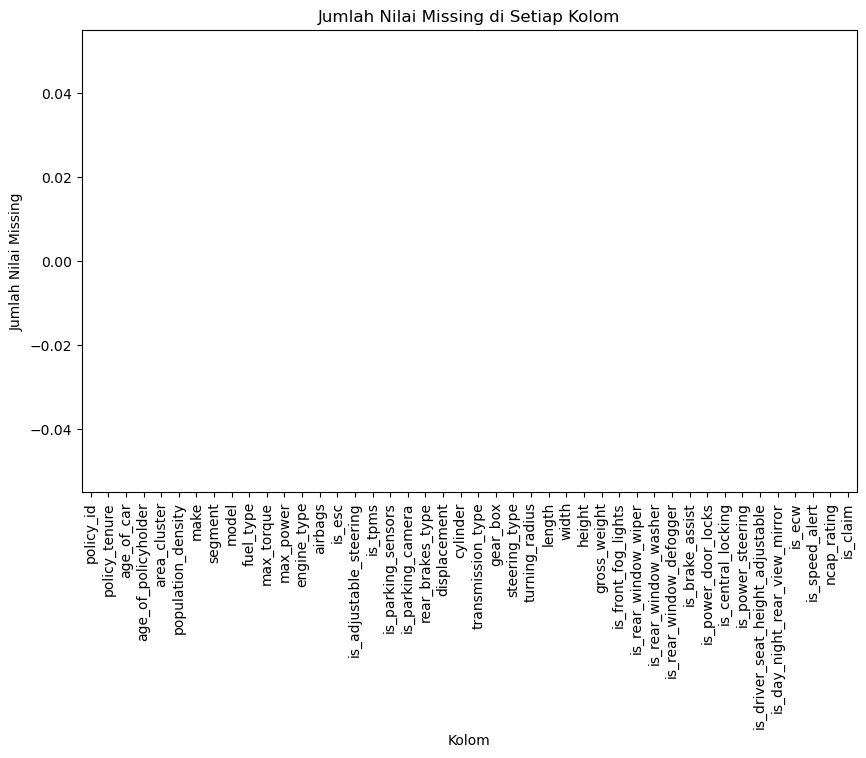

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
null_counts = df.select([count(when(isnan(c) | isnull(c), 1)).alias(c) for c in df.columns])

# Konversi ke Pandas DataFrame
null_counts_pd = null_counts.toPandas()

# Transpose dataframe agar lebih mudah digunakan untuk plotting
null_counts_pd = null_counts_pd.T
null_counts_pd.columns = ['missing_count']
null_counts_pd = null_counts_pd.reset_index()
null_counts_pd.columns = ['column_name', 'missing_count']

# Set plot size
plt.figure(figsize=(10, 6))

# Plot dengan Seaborn
sns.barplot(data=null_counts_pd, x='column_name', y='missing_count', palette='viridis')

# Tambahkan label dan judul
plt.xlabel('Kolom')
plt.ylabel('Jumlah Nilai Missing')
plt.title('Jumlah Nilai Missing di Setiap Kolom')
plt.xticks(rotation=90)  # Rotasi label x-axis untuk lebih mudah dibaca

# Tampilkan plot
# plt.tight_layout()  # Mengatur tata letak agar tidak terpotong
plt.show()

In [12]:
dt.select([count(when(isnan(c) | isnull(c), 1)).alias(c) for c in dt.columns]).show()

+---------+-------------+----------+-------------------+------------+------------------+----+-------+-----+---------+----------+---------+-----------+-------+------+----------------------+-------+------------------+-----------------+----------------+------------+--------+-----------------+--------+-------------+--------------+------+-----+------+------------+-------------------+--------------------+---------------------+-----------------------+---------------+-------------------+------------------+-----------------+--------------------------------+-----------------------------+------+--------------+-----------+
|policy_id|policy_tenure|age_of_car|age_of_policyholder|area_cluster|population_density|make|segment|model|fuel_type|max_torque|max_power|engine_type|airbags|is_esc|is_adjustable_steering|is_tpms|is_parking_sensors|is_parking_camera|rear_brakes_type|displacement|cylinder|transmission_type|gear_box|steering_type|turning_radius|length|width|height|gross_weight|is_front_fog_lights|

# Duplicate Values

In [13]:
total_rowdf = df.count()
df_no_duplicates = df.dropDuplicates()
duplicate_count = total_rowdf - df_no_duplicates.count()
duplicate_percentage = duplicate_count / total_rowdf * 100

print(f'Ditemukan {duplicate_count} baris yang sama pada data train, ini adalah {duplicate_percentage:.2f}% dari data')

total_rowdt = dt.count()
dt_no_duplicates = dt.dropDuplicates()
duplicate_count = total_rowdt - dt_no_duplicates.count()
duplicate_percentage = duplicate_count / total_rowdt * 100

print(f'Ditemukan {duplicate_count} baris yang sama pada data test, ini adalah {duplicate_percentage:.2f}% dari data')

Ditemukan 0 baris yang sama pada data train, ini adalah 0.00% dari data
Ditemukan 0 baris yang sama pada data test, ini adalah 0.00% dari data


In [14]:
total_rowdf = df.count()
df_no_duplicates = df.dropDuplicates()
duplicate_count = total_rowdf - df_no_duplicates.count()
duplicate_percentage = duplicate_count / total_rowdf * 100

print(f'Ditemukan {duplicate_count} baris yang sama pada data train, ini adalah {duplicate_percentage:.2f}% dari data')

Ditemukan 0 baris yang sama pada data train, ini adalah 0.00% dari data


# EDA

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#presentase claim dan unclaim 
total_claims = df.filter(df['is_claim'] == 1).count()
total_rows = df.count()
percentage_claims = (total_claims / total_rows) * 100
unclaim = 100 - percentage_claims

# Tampilkan hasil
print("Total Klaim: ", total_claims)
print("Total Baris: ", total_rows)
print("Presentase Total Klaim: {:.2f}%".format(percentage_claims))
print("Presentase Total Tidak Klaim: {:.2f}%".format(unclaim))

Total Klaim:  3748
Total Baris:  58592
Presentase Total Klaim: 6.40%
Presentase Total Tidak Klaim: 93.60%


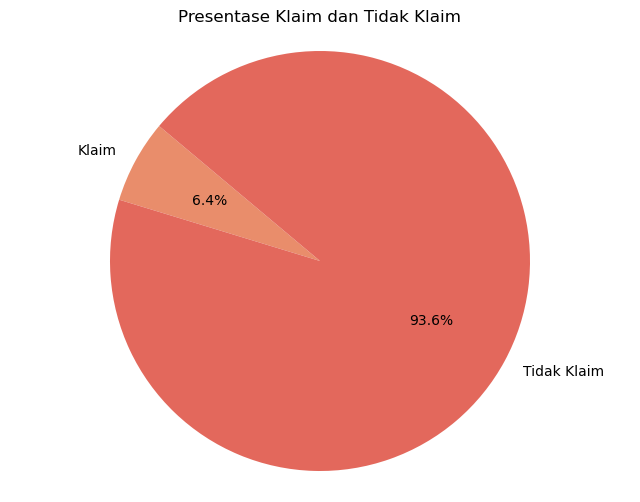

In [25]:
labels = ['Klaim', 'Tidak Klaim']
sizes = [percentage_claims, unclaim]

# Palette warna "rocket" dari Seaborn
colors = sns.color_palette('flare')

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
plt.title('Presentase Klaim dan Tidak Klaim')
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.show()

+------------+-----+
|area_cluster|count|
+------------+-----+
|          C6|   55|
|         C22|   17|
|         C21|   29|
|         C18|   26|
|          C3|  433|
|          C4|   51|
|         C11|   72|
|         C12|   87|
|         C14|  281|
|         C20|    5|
|          C5|  403|
|          C9|  136|
|         C16|   23|
|          C8|  954|
|         C13|  195|
|          C1|   76|
|          C2|  520|
|         C15|   38|
|          C7|  109|
|         C17|   19|
+------------+-----+
only showing top 20 rows

+------------+------------+----------+------------------+
|area_cluster|total_claims|total_rows|  percentage_claim|
+------------+------------+----------+------------------+
|          C6|          55|       890| 6.179775280898876|
|         C22|          17|       207| 8.212560386473431|
|         C21|          29|       379| 7.651715039577836|
|         C18|          26|       242|10.743801652892563|
|          C3|         433|      6101| 7.097197180790034|
|     

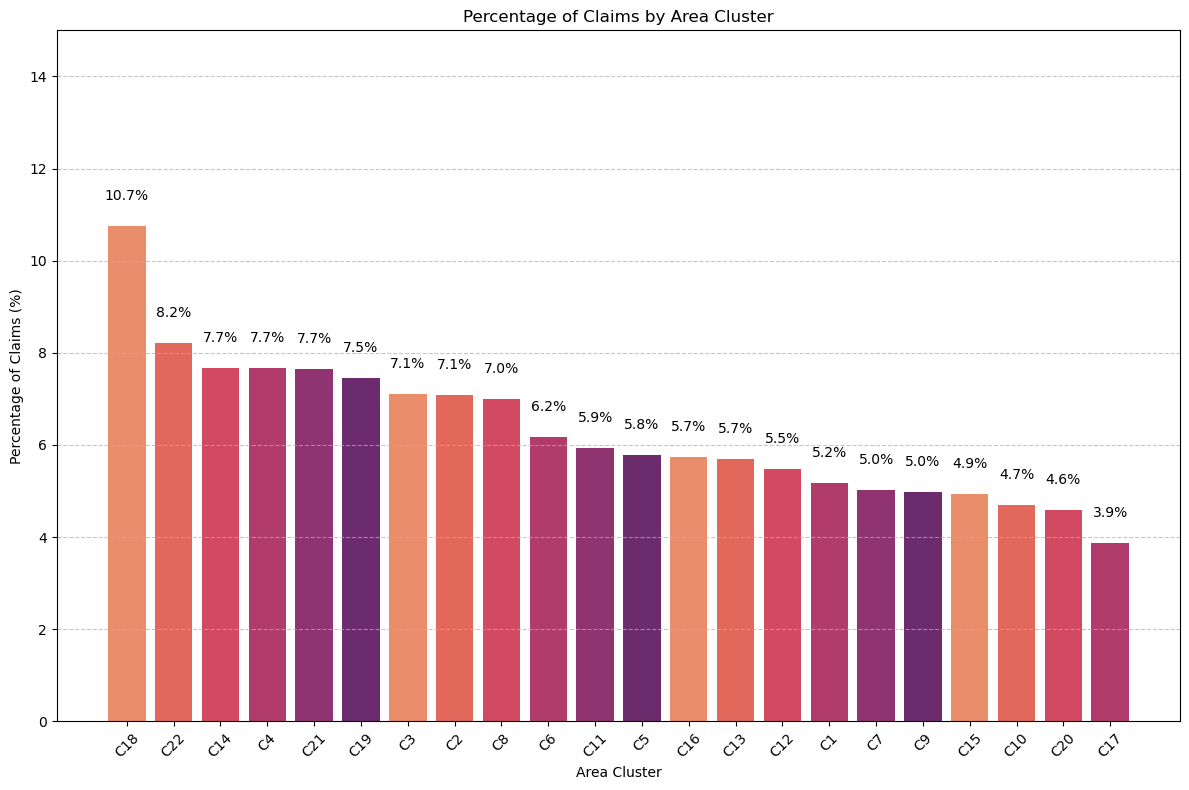

In [18]:
df_filtered = df.filter(col('is_claim') == 1)
df_selected = df_filtered.select('area_cluster', 'is_claim')
df_grouped = df_selected.groupBy('area_cluster').count()
df_grouped.show()

total_claims_df = df_grouped.withColumnRenamed('count', 'total_claims')
total_rows_df = df.groupBy('area_cluster').count().withColumnRenamed('count', 'total_rows')

df_combined = total_claims_df.join(total_rows_df, 'area_cluster')
df_percentage = df_combined.withColumn('percentage_claim', col('total_claims') / col('total_rows') * 100)
df_percentage.show()
df_sorted = df_percentage.orderBy('percentage_claim', ascending=False).toPandas()

plt.figure(figsize=(12, 8))
bars = plt.bar(df_sorted['area_cluster'], df_sorted['percentage_claim'], color=colors)
plt.xlabel('Area Cluster')
plt.ylabel('Percentage of Claims (%)')
plt.title('Percentage of Claims by Area Cluster')
plt.xticks(rotation=45)
plt.ylim(0, 15)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

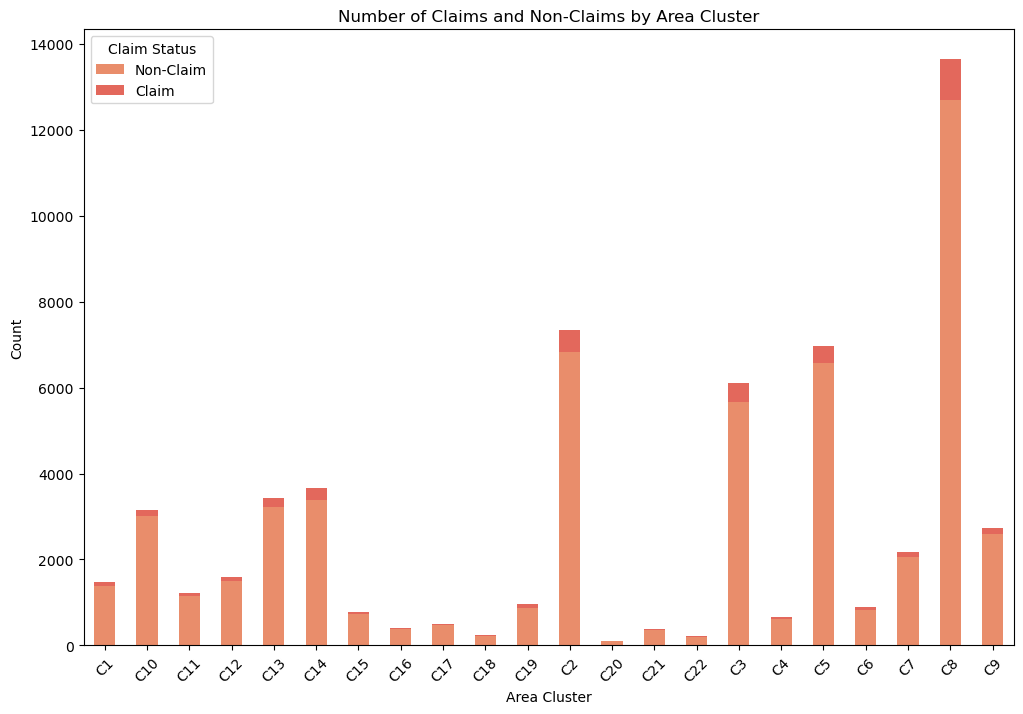

In [19]:
colors = sns.color_palette('flare')
df_grouped = df.groupBy('area_cluster', 'is_claim').count()
df_pandas = df_grouped.toPandas()
df_pivot = df_pandas.pivot(index='area_cluster', columns='is_claim', values='count').fillna(0)
df_pivot.columns = ['Non-Claim', 'Claim']

plt.figure(figsize=(12, 8))
df_pivot.plot(kind='bar', stacked=True, color=colors, figsize=(12, 8))
plt.xlabel('Area Cluster')
plt.ylabel('Count')
plt.title('Number of Claims and Non-Claims by Area Cluster')
plt.xticks(rotation=45)
plt.legend(title='Claim Status', labels=['Non-Claim', 'Claim'])
plt.show()

In [20]:
#tujuan mencari tahu apakah density yang padat juga memiliki klaim terbanyak (bisa pake presentase)
df_max_density = df.groupBy('area_cluster').agg(max('population_density').alias('max_population_density'))
df_sorted = df_max_density.sort(col('max_population_density').desc())
df_sorted.show()
max_density_cluster = df_sorted.first()
print(f"Area cluster with the highest population density: {max_density_cluster['area_cluster']} with density {max_density_cluster['max_population_density']}")

+------------+----------------------+
|area_cluster|max_population_density|
+------------+----------------------+
|          C8|                  8794|
|         C14|                  7788|
|         C10|                 73430|
|         C17|                 65567|
|          C7|                  6112|
|         C11|                  6108|
|         C13|                  5410|
|          C1|                  4990|
|          C3|                  4076|
|         C18|                 35036|
|         C12|                 34791|
|          C5|                 34738|
|         C21|                  3264|
|         C15|                   290|
|         C19|                 27742|
|          C2|                 27003|
|          C4|                 21622|
|         C20|                 20905|
|          C9|                 17804|
|         C22|                 16733|
+------------+----------------------+
only showing top 20 rows

Area cluster with the highest population density: C8 with dens

In [12]:
df_claims = df.filter(col("is_claim") == 1)
df_grouped = df_claims.groupBy("is_parking_sensors").agg(count("*").alias("claim_count"))
df_grouped.show()

total_claims = df_claims.count()
df_with_percentage = df_grouped.withColumn("percentage", (col("claim_count") / total_claims) * 100)
df_with_percentage.show()

parking_sensors_claims = df_claims.filter(col("is_parking_sensors") == 'Yes').count()
no_parking_sensors_claims = df_claims.filter(col("is_parking_sensors") == 'No').count()

if parking_sensors_claims > no_parking_sensors_claims:
    print("Kebanyakan mobil yang melakukan klaim mempunyai sensor parkir.")
else:
    print("Kebanyakan mobil yang melakukan klaim tidak mempunyai sensor parkir.")

total_with_parking_sensors = df.filter(col("is_parking_sensors") == 'Yes').count()
total_no_parking_sensors = df.filter(col("is_parking_sensors") == 'No').count()

if total_with_parking_sensors > 0:
    percentage_with_sensors_and_claims = (parking_sensors_claims / total_with_parking_sensors) * 100
    print(f"Persentase mobil dengan sensor parkir yang melakukan klaim adalah {percentage_with_sensors_and_claims:.2f}%.")
else:
    print("Tidak ada mobil dengan sensor parkir dalam dataset.")
    
if total_no_parking_sensors > 0:
    percentage_without_sensors_and_claims = (no_parking_sensors_claims / total_no_parking_sensors) * 100
    print(f"Persentase mobil tanpa sensor parkir yang melakukan klaim adalah {percentage_without_sensors_and_claims:.2f}%.")
else:
    print("Tidak ada mobil dengan sensor parkir dalam dataset.")

+------------------+-----------+
|is_parking_sensors|claim_count|
+------------------+-----------+
|                No|        128|
|               Yes|       3620|
+------------------+-----------+

+------------------+-----------+------------------+
|is_parking_sensors|claim_count|        percentage|
+------------------+-----------+------------------+
|                No|        128|3.4151547491995733|
|               Yes|       3620| 96.58484525080043|
+------------------+-----------+------------------+

Kebanyakan mobil yang melakukan klaim mempunyai sensor parkir.
Persentase mobil dengan sensor parkir yang melakukan klaim adalah 6.44%.
Persentase mobil tanpa sensor parkir yang melakukan klaim adalah 5.39%.


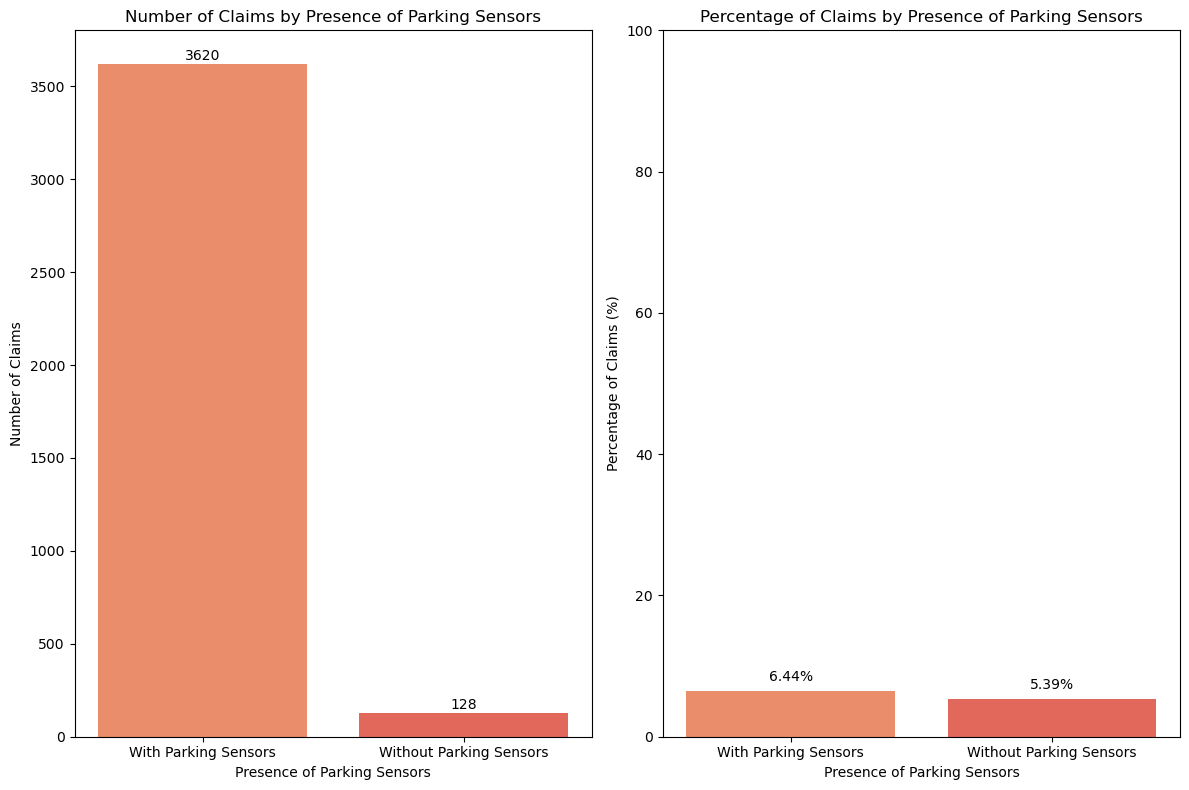

In [22]:
labels = ['With Parking Sensors', 'Without Parking Sensors']
claim_counts = [parking_sensors_claims, no_parking_sensors_claims]
percentages = [percentage_with_sensors_and_claims, percentage_without_sensors_and_claims]

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.bar(labels, claim_counts, color=colors)
plt.xlabel('Presence of Parking Sensors')
plt.ylabel('Number of Claims')
plt.title('Number of Claims by Presence of Parking Sensors')

for i, count in enumerate(claim_counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=10)

plt.subplot(1, 2, 2)
plt.bar(labels, percentages, color=colors)
plt.xlabel('Presence of Parking Sensors')
plt.ylabel('Percentage of Claims (%)')
plt.title('Percentage of Claims by Presence of Parking Sensors')

for i, percent in enumerate(percentages):
    plt.text(i, percent + 1, f'{percent:.2f}%', ha='center', va='bottom', fontsize=10)

plt.ylim(0, 100)  
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

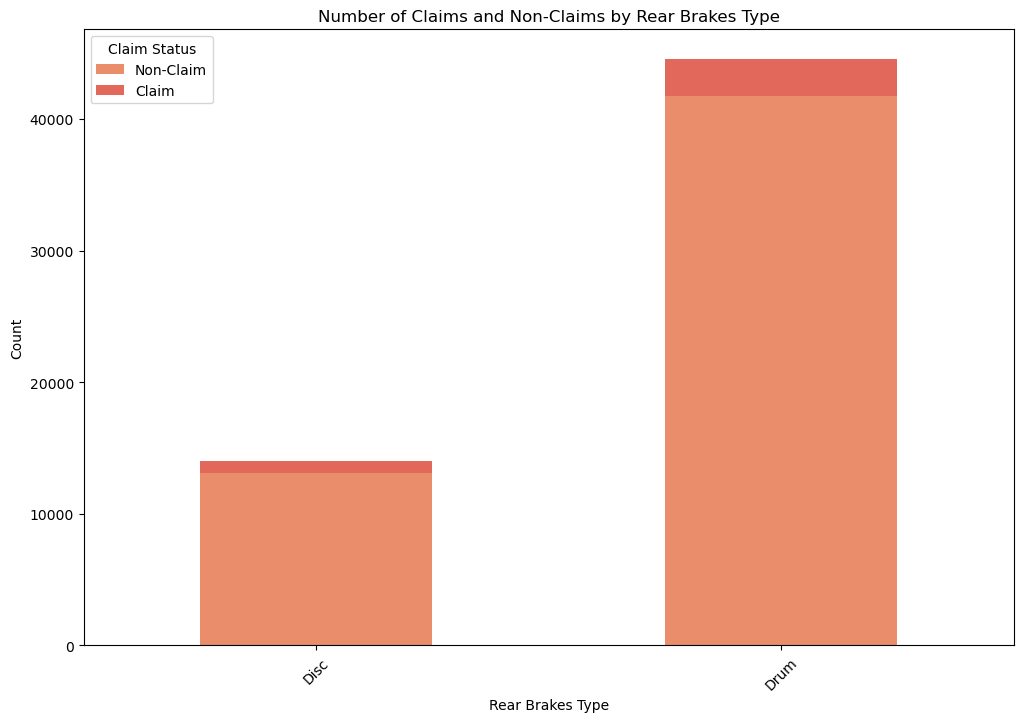

In [23]:
from pyspark.sql.functions import col, count
df_grouped = df.groupBy("is_claim", "rear_brakes_type").agg(count("*").alias("count"))
df_pandas = df_grouped.toPandas()
df_pivot = df_pandas.pivot(index='rear_brakes_type', columns='is_claim', values='count').fillna(0)
df_pivot.columns = ['Non-Claim', 'Claim']
plt.figure(figsize=(12, 8))
df_pivot.plot(kind='bar', stacked=True, color=colors,figsize=(12, 8))
plt.xlabel('Rear Brakes Type')
plt.ylabel('Count')
plt.title('Number of Claims and Non-Claims by Rear Brakes Type')
plt.xticks(rotation=45)
plt.legend(title='Claim Status', labels=['Non-Claim', 'Claim'])
plt.show()

In [24]:

df_claims = df.filter(col("is_claim") == 1)
df_grouped = df_claims.groupBy("rear_brakes_type").agg(count("*").alias("claim_count"))
df_grouped.show()

total_claims = df_claims.count()

df_with_percentage = df_grouped.withColumn("percentage", (col("claim_count") / total_claims) * 100)
df_with_percentage.show()

disc_brakes_claims = df_claims.filter(col("rear_brakes_type") == 'Disc').count()
drum_brakes_claims = df_claims.filter(col("rear_brakes_type") == 'Drum').count()

if disc_brakes_claims > drum_brakes_claims:
    print("Kebanyakan mobil yang melakukan klaim memiliki tipe rear brake Disc.")
else:
    print("Kebanyakan mobil yang melakukan klaim memiliki tipe rear brake Drum.")

df_drum_brakes = df.filter(col("rear_brakes_type") == 'Drum')
df_disc_brakes = df.filter(col("rear_brakes_type") == 'Disc')

total_drum_brakes = df_drum_brakes.count()
total_disc_brakes = df_disc_brakes.count()

if total_drum_brakes > 0:
    drum_brakes_claim_percentage = (drum_brakes_claims / total_drum_brakes) * 100
    print(f"Persentase klaim untuk mobil dengan tipe rear brake Drum dari total mobil dengan tipe ini adalah {drum_brakes_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan tipe rear brake Drum dalam dataset.")

if total_disc_brakes > 0:
    disc_brakes_claim_percentage = (disc_brakes_claims / total_disc_brakes) * 100
    print(f"Persentase klaim untuk mobil dengan tipe rear brake Disc dari total mobil dengan tipe ini adalah {disc_brakes_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan tipe rear brake disc dalam dataset.")

+----------------+-----------+
|rear_brakes_type|claim_count|
+----------------+-----------+
|            Drum|       2847|
|            Disc|        901|
+----------------+-----------+

+----------------+-----------+-----------------+
|rear_brakes_type|claim_count|       percentage|
+----------------+-----------+-----------------+
|            Drum|       2847|75.96051227321237|
|            Disc|        901|24.03948772678762|
+----------------+-----------+-----------------+

Kebanyakan mobil yang melakukan klaim memiliki tipe rear brake Drum.
Persentase klaim untuk mobil dengan tipe rear brake Drum dari total mobil dengan tipe ini adalah 6.39%.
Persentase klaim untuk mobil dengan tipe rear brake Disc dari total mobil dengan tipe ini adalah 6.43%.


+----------------------+-----------+
|is_adjustable_steering|claim_count|
+----------------------+-----------+
|                    No|       1378|
|                   Yes|       2370|
+----------------------+-----------+

+----------------------+-----------+-----------------+
|is_adjustable_steering|claim_count|       percentage|
+----------------------+-----------+-----------------+
|                    No|       1378|36.76627534685166|
|                   Yes|       2370|63.23372465314835|
+----------------------+-----------+-----------------+

Kebanyakan mobil yang melakukan klaim mempunyai adjustable steering.
Persentase mobil dengan adjustable steering yang melakukan klaim adalah 6.67%.
Persentase mobil tanpa adjustable steering yang melakukan klaim adalah 5.97%.


C:\Users\Evelyn\AppData\Local\Temp\ipykernel_22664\2664674960.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result_df, x='is_adjustable_steering', y='claim_count', palette='flare')


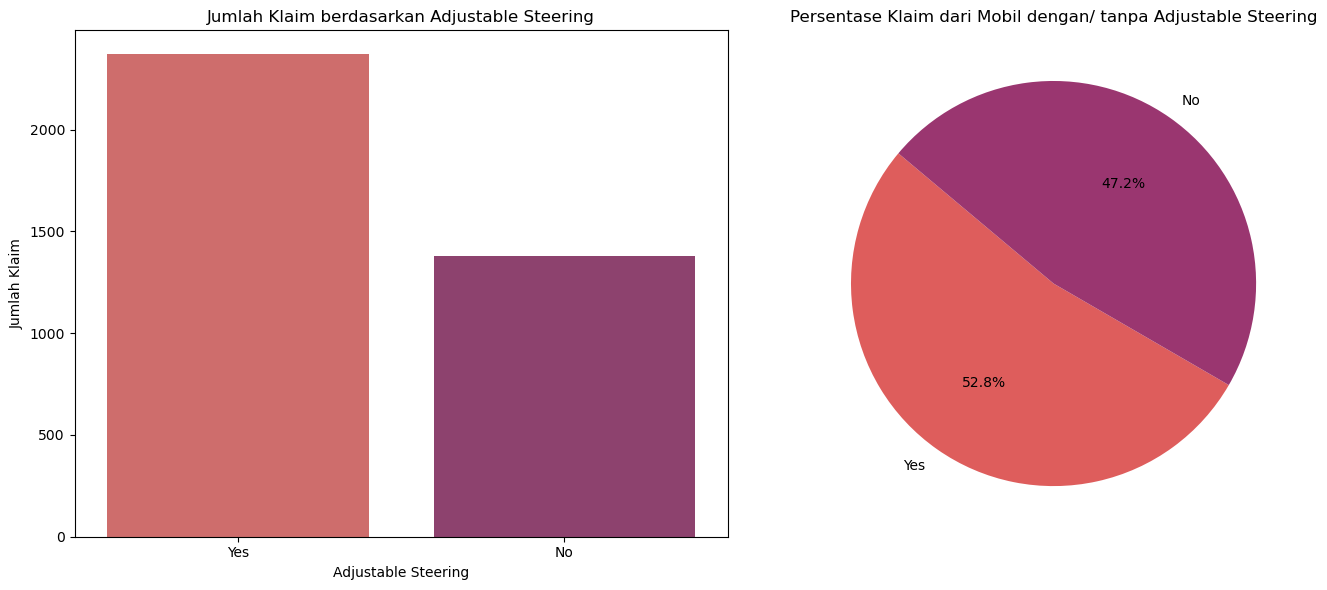

In [42]:
# Filter DataFrame untuk klaim
df_claims = df.filter(col("is_claim") == 1)

df_grouped = df_claims.groupBy("is_adjustable_steering").agg(count("*").alias("claim_count"))
df_grouped.show()

total_claims = df_claims.count()

df_with_percentage = df_grouped.withColumn("percentage", (col("claim_count") / total_claims) * 100)
df_with_percentage.show()

adjustable_steering_claims = df_claims.filter(col("is_adjustable_steering") == 'Yes').count()
no_adjustable_steering_claims = df_claims.filter(col("is_adjustable_steering") == 'No').count()

if adjustable_steering_claims > no_adjustable_steering_claims:
    print("Kebanyakan mobil yang melakukan klaim mempunyai adjustable steering.")
else:
    print("Kebanyakan mobil yang melakukan klaim tidak mempunyai adjustable steering.")

total_yes_AS = df.filter(col("is_adjustable_steering") == 'Yes').count()
total_no_AS = df.filter(col("is_adjustable_steering") == 'No').count()

if total_yes_AS > 0:
    adjustable_steering_claim_percentage = (adjustable_steering_claims / total_yes_AS) * 100
    print(f"Persentase mobil dengan adjustable steering yang melakukan klaim adalah {adjustable_steering_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan adjustable steering dalam dataset.")

if total_no_AS > 0:
    no_adjustable_steering_claim_percentage = (no_adjustable_steering_claims / total_no_AS) * 100
    print(f"Persentase mobil tanpa adjustable steering yang melakukan klaim adalah {no_adjustable_steering_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil tanpa adjustable steering dalam dataset.")

result_data = {
    'is_adjustable_steering': ['Yes', 'No'],
    'total_cars': [total_yes_AS, total_no_AS],
    'claim_count': [adjustable_steering_claims, no_adjustable_steering_claims],
    'claim_percentage': [adjustable_steering_claim_percentage, no_adjustable_steering_claim_percentage]
}

result_df = pd.DataFrame(result_data)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1
sns.barplot(data=result_df, x='is_adjustable_steering', y='claim_count', palette='flare')
plt.title('Jumlah Klaim berdasarkan Adjustable Steering')
plt.xlabel('Adjustable Steering')
plt.ylabel('Jumlah Klaim')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2
labels = result_df['is_adjustable_steering']
sizes = result_df['claim_percentage']
colors = sns.color_palette('flare', len(labels))

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Klaim dari Mobil dengan/ tanpa Adjustable Steering')

# Tampilkan plot
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

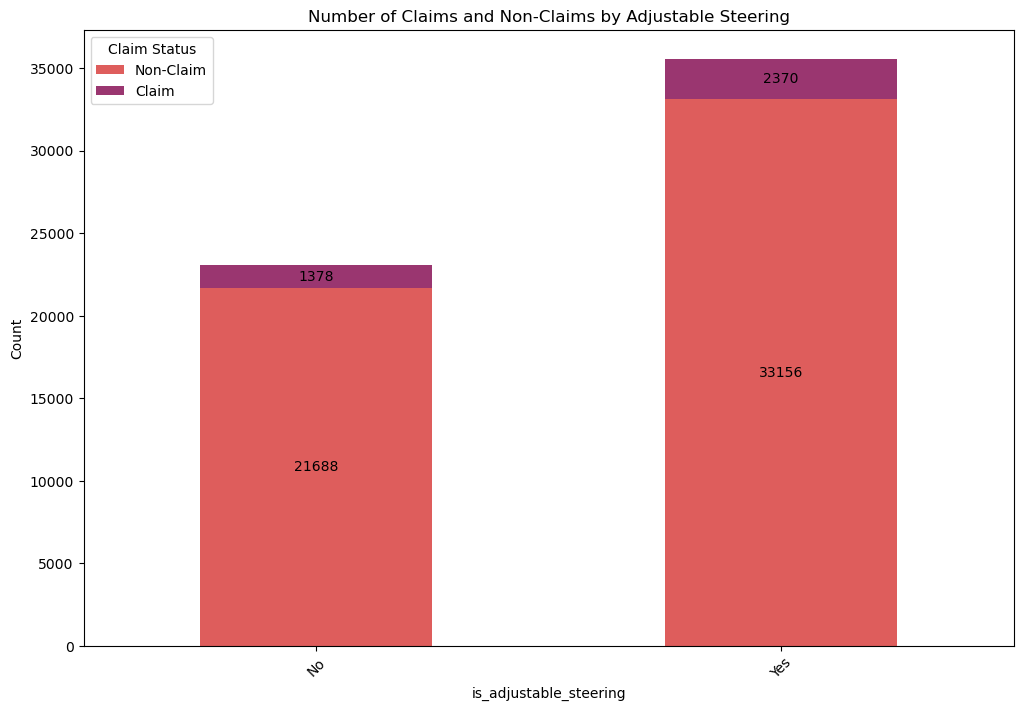

In [26]:
df_grouped = df.groupBy("is_claim", "is_adjustable_steering").agg(count("*").alias("count"))
df_pandas = df_grouped.toPandas()
df_pivot = df_pandas.pivot(index='is_adjustable_steering', columns='is_claim', values='count').fillna(0)
df_pivot.columns = ['Non-Claim', 'Claim']

flare_colors = sns.color_palette('flare', len(df_pivot.columns))

plt.figure(figsize=(12, 8))
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(12, 8), color=flare_colors)

# Menambahkan label angka ke grafik
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() / 2
    height = p.get_height()
    if height > 0:  # Pastikan kita tidak menambahkan label untuk batang dengan height 0
        ax.text(x, p.get_y() + height / 2, f'{int(height)}', ha='center', va='center')

plt.xlabel('is_adjustable_steering')
plt.ylabel('Count')
plt.title('Number of Claims and Non-Claims by Adjustable Steering')
plt.xticks(rotation=45)
plt.legend(title='Claim Status', labels=['Non-Claim', 'Claim'])

plt.show()

<Figure size 1200x800 with 0 Axes>

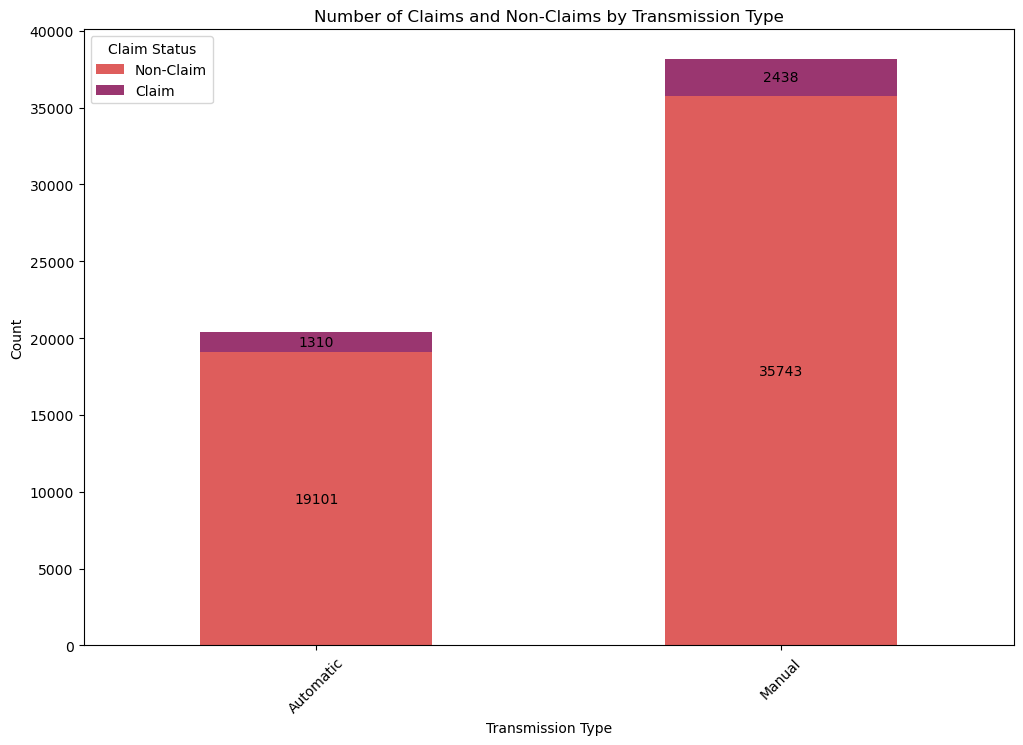

In [27]:
df_grouped = df.groupBy("is_claim", "transmission_type").agg(count("*").alias("count"))

df_pandas = df_grouped.toPandas()

df_pivot = df_pandas.pivot(index='transmission_type', columns='is_claim', values='count').fillna(0)
df_pivot.columns = ['Non-Claim', 'Claim']

flare_colors = sns.color_palette('flare', len(df_pivot.columns))

plt.figure(figsize=(12, 8))
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(12, 8), color=flare_colors)

# Menambahkan label angka ke grafik
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() / 2
    height = p.get_height()
    if height > 0:  # Pastikan kita tidak menambahkan label untuk batang dengan height 0
        ax.text(x, p.get_y() + height / 2, f'{int(height)}', ha='center', va='center')

plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.title('Number of Claims and Non-Claims by Transmission Type')
plt.xticks(rotation=45)
plt.legend(title='Claim Status', labels=['Non-Claim', 'Claim'])

plt.show()

In [28]:
from pyspark.sql.functions import col, count
df_claims = df.filter(col("is_claim") == 1)
df_grouped = df_claims.groupBy("transmission_type").agg(count("*").alias("claim_count"))
df_grouped.show()

total_claims = df_claims.count()

df_with_percentage = df_grouped.withColumn("percentage", (col("claim_count") / total_claims) * 100)
df_with_percentage.show()

automatic_claims = df_claims.filter(col("transmission_type") == 'Automatic').count()
manual_claims = df_claims.filter(col("transmission_type") == 'Manual').count()

if automatic_claims > manual_claims:
    print("Kebanyakan mobil yang melakukan klaim memiliki tipe transmission Automatic.")
else:
    print("Kebanyakan mobil yang melakukan klaim memiliki tipe transmission Manual.")

df_manual = df.filter(col("transmission_type") == 'Manual')
df_automatic = df.filter(col("transmission_type") == 'Automatic')

total_manual = df_manual.count()
total_automatic = df_automatic.count()

if total_manual > 0:
    manual_claim_percentage = (manual_claims / total_manual) * 100
    print(f"Persentase klaim untuk mobil dengan tipe rear brake Manual dari total mobil dengan tipe ini adalah {manual_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan tipe rear brake Manual dalam dataset.")

if total_automatic > 0:
    automatic_claim_percentage = (automatic_claims / total_automatic) * 100
    print(f"Persentase klaim untuk mobil dengan tipe rear brake Automatic dari total mobil dengan tipe ini adalah {automatic_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan tipe rear brake automatic dalam dataset.")

+-----------------+-----------+
|transmission_type|claim_count|
+-----------------+-----------+
|        Automatic|       1310|
|           Manual|       2438|
+-----------------+-----------+

+-----------------+-----------+-----------------+
|transmission_type|claim_count|       percentage|
+-----------------+-----------+-----------------+
|        Automatic|       1310|34.95197438633938|
|           Manual|       2438|65.04802561366063|
+-----------------+-----------+-----------------+

Kebanyakan mobil yang melakukan klaim memiliki tipe transmission Manual.
Persentase klaim untuk mobil dengan tipe rear brake Manual dari total mobil dengan tipe ini adalah 6.39%.
Persentase klaim untuk mobil dengan tipe rear brake Automatic dari total mobil dengan tipe ini adalah 6.42%.


<Figure size 1200x800 with 0 Axes>

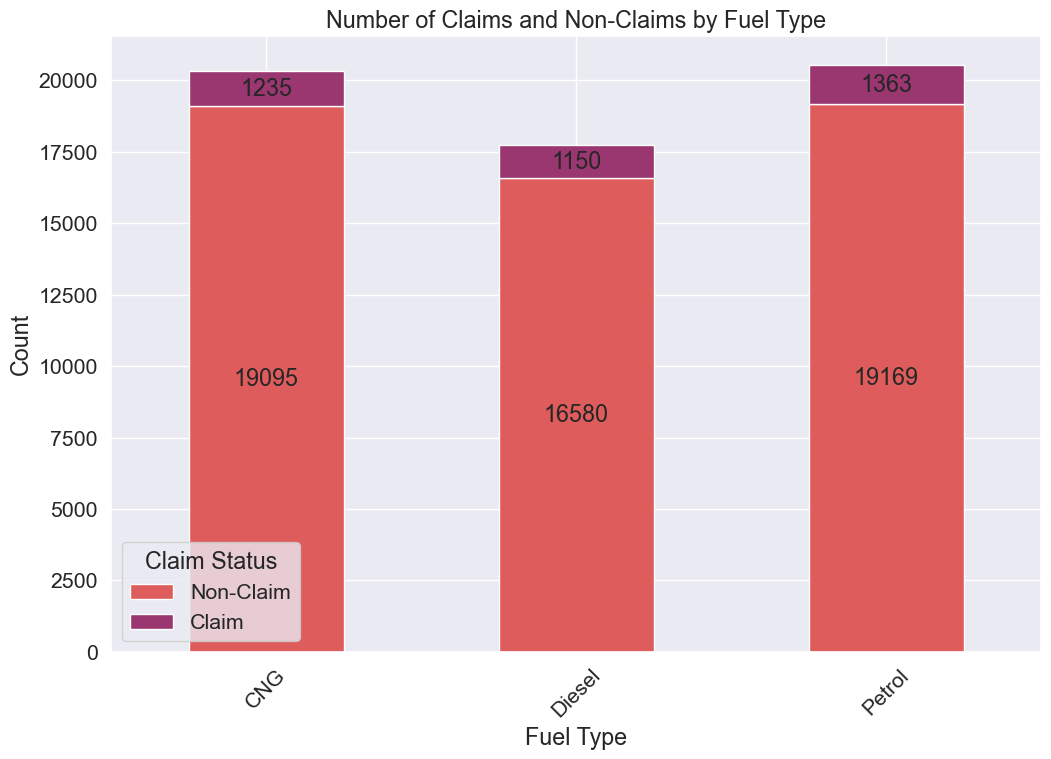

In [103]:
df_grouped = df.groupBy("is_claim", "fuel_type").agg(count("*").alias("count"))

df_pandas = df_grouped.toPandas()

df_pivot = df_pandas.pivot(index='fuel_type', columns='is_claim', values='count').fillna(0)
df_pivot.columns = ['Non-Claim', 'Claim']

flare_colors = sns.color_palette('flare', len(df_pivot.columns))

plt.figure(figsize=(12, 8))
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(12, 8), color=flare_colors)

# Menambahkan label angka ke grafik
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() / 2
    height = p.get_height()
    if height > 0:  # Pastikan kita tidak menambahkan label untuk batang dengan height 0
        ax.text(x, p.get_y() + height / 2, f'{int(height)}', ha='center', va='center')

plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Number of Claims and Non-Claims by Fuel Type')
plt.xticks(rotation=45)
plt.legend(title='Claim Status', labels=['Non-Claim', 'Claim'])

plt.show()

In [102]:
df_claims = df.filter(col("is_claim") == 1)
df_grouped = df_claims.groupBy("fuel_type").agg(count("*").alias("claim_count"))
df_grouped.show()

total_claims = df_claims.count()

df_with_percentage = df_grouped.withColumn("percentage", (col("claim_count") / total_claims) * 100)
df_with_percentage.show()

cng_claims = df_claims.filter(col("fuel_type") == "CNG").count()
diesel_claims = df_claims.filter(col("fuel_type") == "Diesel").count()
petrol_claims = df_claims.filter(col("fuel_type") == "Petrol").count()

if cng_claims > diesel_claims & cng_claims > petrol_claims:
    print("Kebanyakan mobil yang melakukan klaim memiliki bahan bakar CNG.")
elif diesel_claims > diesel_claims & diesel_claims > petrol_claims:
    print("Kebanyakan mobil yang melakukan klaim memiliki bahan bakar Diesel.")
else:
    print("Kebanyakan mobil yang melakukan klaim memiliki bahan bakar Petrol.")

df_cng = df.filter(col("fuel_type") == "CNG")
df_diesel = df.filter(col("fuel_type") == "Diesel")
df_petrol = df.filter(col("fuel_type") == "Petrol")

total_cng = df_cng.count()
total_diesel = df_diesel.count()
total_petrol = df_petrol.count()

if total_cng > 0:
    sng_claim_percentage = (cng_claims / total_cng) * 100
    print(f"Persentase mobil dengan bahan bakar CNG yang melakukan klaim adalah {sng_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan tipe NO dalam dataset.")

if total_diesel > 0:
    diesel_claim_percentage = (diesel_claims / total_diesel) * 100
    print(f"Persentase mobil dengan bahan bakar Diesel yang melakukan klaim adalah {diesel_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan tipe YES dalam dataset.")

if total_petrol > 0:
    petrol_claim_percentage = (petrol_claims / total_petrol) * 100
    print(f"Persentase mobil dengan bahan bakar Petrol yang melakukan klaim adalah {petrol_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan tipe YES dalam dataset.")

+---------+-----------+
|fuel_type|claim_count|
+---------+-----------+
|   Diesel|       1150|
|      CNG|       1235|
|   Petrol|       1363|
+---------+-----------+

+---------+-----------+------------------+
|fuel_type|claim_count|        percentage|
+---------+-----------+------------------+
|   Diesel|       1150|30.683030949839914|
|      CNG|       1235|32.950907150480255|
|   Petrol|       1363| 36.36606189967983|
+---------+-----------+------------------+

Kebanyakan mobil yang melakukan klaim memiliki bahan bakar Petrol.
Persentase mobil dengan bahan bakar CNG yang melakukan klaim adalah 6.07%.
Persentase mobil dengan bahan bakar Diesel yang melakukan klaim adalah 6.49%.
Persentase mobil dengan bahan bakar Petrol yang melakukan klaim adalah 6.64%.


<Figure size 1200x800 with 0 Axes>

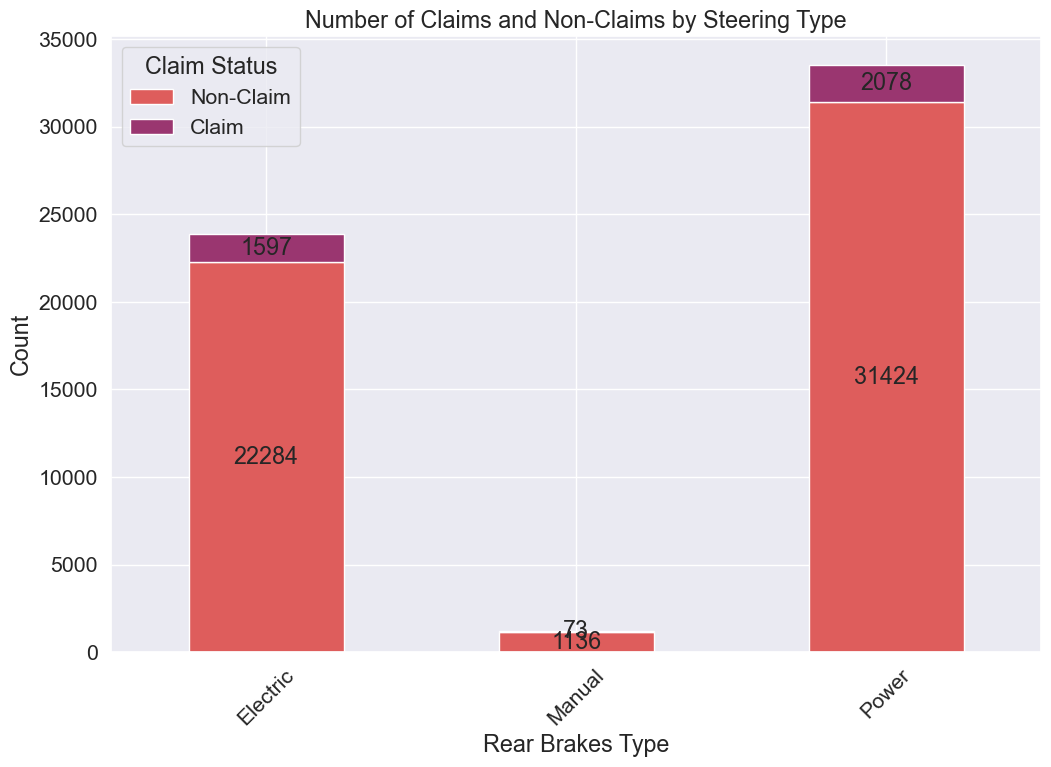

In [105]:
df_grouped = df.groupBy("is_claim", "steering_type").agg(count("*").alias("count"))
df_pandas = df_grouped.toPandas()
df_pivot = df_pandas.pivot(index='steering_type', columns='is_claim', values='count').fillna(0)
df_pivot.columns = ['Non-Claim', 'Claim']

plt.figure(figsize=(12, 8))
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(12, 8), color=flare_colors)

# Menambahkan label angka ke grafik
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() / 2
    height = p.get_height()
    if height > 0:  # Pastikan kita tidak menambahkan label untuk batang dengan height 0
        ax.text(x, p.get_y() + height / 2, f'{int(height)}', ha='center', va='center')
        
plt.xlabel('Rear Brakes Type')
plt.ylabel('Count')
plt.title('Number of Claims and Non-Claims by Steering Type')
plt.xticks(rotation=45)
plt.legend(title='Claim Status', labels=['Non-Claim', 'Claim'])
plt.show()

In [106]:
df_claims = df.filter(col("is_claim") == 1)
df_grouped = df_claims.groupBy("steering_type").agg(count("*").alias("claim_count"))
df_grouped.show()
total_claims = df_claims.count()
df_with_percentage = df_grouped.withColumn("percentage", (col("claim_count") / total_claims) * 100)
df_with_percentage.show()
elt_steering_type_claims = df_claims.filter(col("steering_type") == "Electric").count()
man_steering_type_claims = df_claims.filter(col("steering_type") == "Manual").count()
pwr_steering_type_claims = df_claims.filter(col("steering_type") == "Power").count()

if elt_steering_type_claims > man_steering_type_claims and elt_steering_type_claims > pwr_steering_type_claims:
    print("Kebanyakan mobil yang melakukan klaim memiliki tipe steering Electric.")
elif man_steering_type_claims > elt_steering_type_claims and man_steering_type_claims > pwr_steering_type_claims:
    print("Kebanyakan mobil yang melakukan klaim memiliki tipe steering Manual.")
else:
    print("Kebanyakan mobil yang melakukan klaim memiliki tipe steering Power.")

df_elt = df.filter(col("steering_type") == "Electric")
df_man = df.filter(col("steering_type") == "Manual")
df_pwr = df.filter(col("steering_type") == "Power")

total_elt = df_elt.count()
total_man = df_man.count()
total_pwr = df_pwr.count()


if total_elt > 0:
    elt_claim_percentage = (elt_steering_type_claims / total_elt) * 100
    print(f"Persentase klaim untuk mobil dengan tipe steering Electric dari total mobil adalah {elt_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan tipe steering Electric dalam dataset.")

if total_man > 0:
    man_claim_percentage = (man_steering_type_claims / total_man) * 100
    print(f"Persentase klaim untuk mobil dengan tipe steering Manual dari total mobil adalah {man_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan tipe steering Electric dalam dataset.")

if total_pwr > 0:
    prw_claim_percentage = (pwr_steering_type_claims / total_pwr) * 100
    print(f"Persentase klaim untuk mobil dengan tipe steering Power dari total mobil adalah {prw_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan tipe steering Electric dalam dataset.")

+-------------+-----------+
|steering_type|claim_count|
+-------------+-----------+
|        Power|       2078|
|       Manual|         73|
|     Electric|       1597|
+-------------+-----------+

+-------------+-----------+------------------+
|steering_type|claim_count|        percentage|
+-------------+-----------+------------------+
|        Power|       2078| 55.44290288153682|
|       Manual|         73|1.9477054429028817|
|     Electric|       1597|42.609391675560296|
+-------------+-----------+------------------+

Kebanyakan mobil yang melakukan klaim memiliki tipe steering Power.
Persentase klaim untuk mobil dengan tipe steering Electric dari total mobil adalah 6.69%.
Persentase klaim untuk mobil dengan tipe steering Manual dari total mobil adalah 6.04%.
Persentase klaim untuk mobil dengan tipe steering Power dari total mobil adalah 6.20%.


<Figure size 1200x800 with 0 Axes>

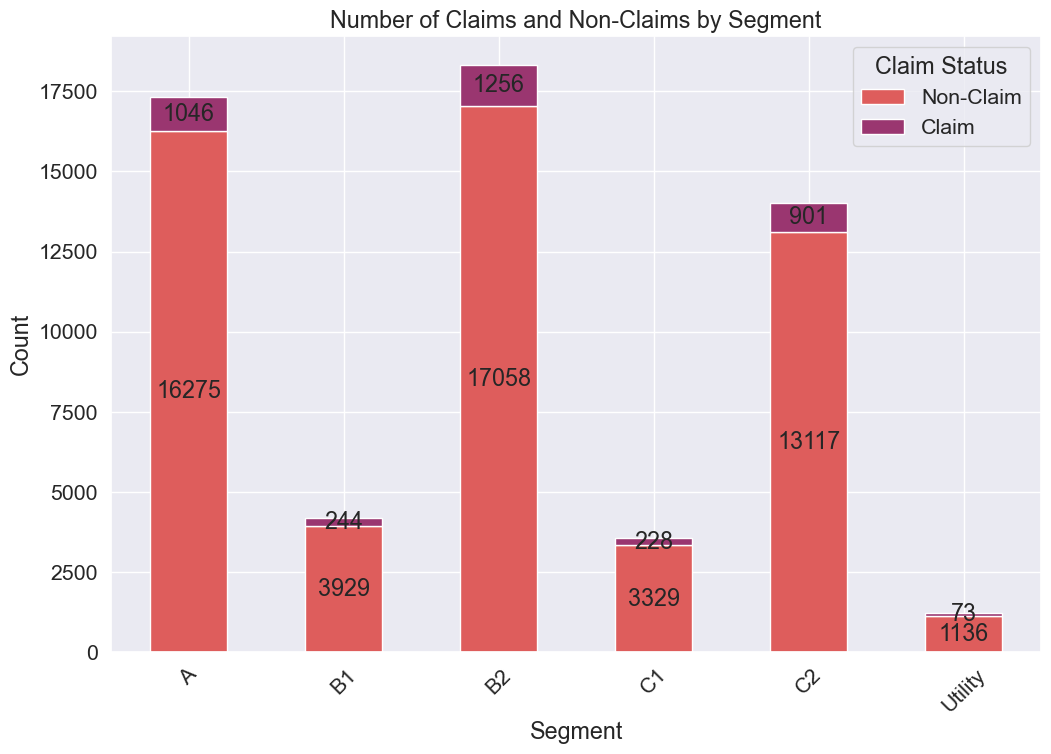

In [107]:
df_grouped = df.groupBy("is_claim", "segment").agg(count("*").alias("count"))
df_pandas = df_grouped.toPandas()
df_pivot = df_pandas.pivot(index='segment', columns='is_claim', values='count').fillna(0)
df_pivot.columns = ['Non-Claim', 'Claim']

plt.figure(figsize=(12, 8))
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(12, 8), color=flare_colors)

# Menambahkan label angka ke grafik
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() / 2
    height = p.get_height()
    if height > 0:  # Pastikan kita tidak menambahkan label untuk batang dengan height 0
        ax.text(x, p.get_y() + height / 2, f'{int(height)}', ha='center', va='center')
        
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Number of Claims and Non-Claims by Segment')
plt.xticks(rotation=45)
plt.legend(title='Claim Status', labels=['Non-Claim', 'Claim'])
plt.show()

In [34]:
df_claims = df.filter(col("is_claim") == 1)
df_grouped = df_claims.groupBy("cylinder").agg(count("*").alias("claim_count"))
df_grouped.show()

total_claims = df_claims.count()

df_with_percentage = df_grouped.withColumn("percentage", (col("claim_count") / total_claims) * 100)
df_with_percentage.show()

c3_claims = df_claims.filter(col("cylinder") == 3).count()
c4_claims = df_claims.filter(col("cylinder") == 4).count()

if c3_claims > c4_claims:
    print("Kebanyakan mobil yang melakukan klaim memiliki 3 cylinder.")
else:
    print("Kebanyakan mobil yang melakukan klaim memiliki 4 cylinder.")

df_c3_brakes = df.filter(col("cylinder") == 3)
df_c4_brakes = df.filter(col("cylinder") == 4)

total_c3_brakes = df_c3_brakes.count()
total_c4_brakes = df_c4_brakes.count()

if total_c3_brakes > 0:
    c3_claim_percentage = (c3_claims / total_c3_brakes) * 100
    print(f"Persentase klaim untuk mobil dengan 3 cylinder dari total mobil adalah {c3_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan 3 cylinder dalam dataset.")

if total_c4_brakes > 0:
    c4_claim_percentage = (c4_claims / total_c4_brakes) * 100
    print(f"Persentase klaim untuk mobil dengan 4 cylinder dari total mobil adalah {c4_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan 4 cylinder dalam dataset.")

+--------+-----------+
|cylinder|claim_count|
+--------+-----------+
|       3|       1305|
|       4|       2443|
+--------+-----------+

+--------+-----------+-----------------+
|cylinder|claim_count|       percentage|
+--------+-----------+-----------------+
|       3|       1305|34.81856990394877|
|       4|       2443|65.18143009605123|
+--------+-----------+-----------------+

Kebanyakan mobil yang melakukan klaim memiliki 4 cylinder.
Persentase klaim untuk mobil dengan 3 cylinder dari total mobil adalah 5.97%.
Persentase klaim untuk mobil dengan 4 cylinder dari total mobil adalah 6.65%.


+--------+-----------+
|gear_box|claim_count|
+--------+-----------+
|       5|       2832|
|       6|        916|
+--------+-----------+

+--------+-----------+------------------+
|gear_box|claim_count|        percentage|
+--------+-----------+------------------+
|       5|       2832| 75.56029882604055|
|       6|        916|24.439701173959445|
+--------+-----------+------------------+

Kebanyakan mobil yang melakukan klaim mempunyai 5 gear box.
Persentase mobil dengan 5 gear box yang melakukan klaim adalah 6.41%.
Persentase mobil tanpa 6 gear box yang melakukan klaim adalah 6.37%.


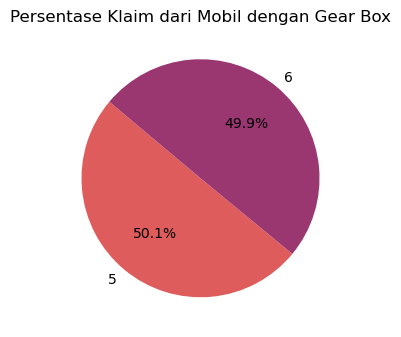

In [35]:
df_claims = df.filter(col("is_claim") == 1)

df_grouped = df_claims.groupBy("gear_box").agg(count("*").alias("claim_count"))
df_grouped.show()

total_claims = df_claims.count()

df_with_percentage = df_grouped.withColumn("percentage", (col("claim_count") / total_claims) * 100)
df_with_percentage.show()

g5_claims = df_claims.filter(col("gear_box") == 5).count()
g6_claims = df_claims.filter(col("gear_box") == 6).count()

if g5_claims > g6_claims:
    print("Kebanyakan mobil yang melakukan klaim mempunyai 5 gear box.")
else:
    print("Kebanyakan mobil yang melakukan klaim mempunyai 6 gear box.")

total_g5 = df.filter(col("gear_box") == 5).count()
total_g6 = df.filter(col("gear_box") == 6).count()

if total_g5 > 0:
    g5_claim_percentage = (g5_claims / total_g5) * 100
    print(f"Persentase mobil dengan 5 gear box yang melakukan klaim adalah {g5_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan 5 gear box dalam dataset.")

if total_g6 > 0:
    g6_claim_percentage = (g6_claims / total_g6) * 100
    print(f"Persentase mobil tanpa 6 gear box yang melakukan klaim adalah {g6_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil tanpa 5 gear box dalam dataset.")
    
result_data = {
    'gear_box': [5, 6],
    'total_cars': [total_g5, total_g6],
    'claim_count': [g5_claims, g6_claims],
    'claim_percentage': [g5_claim_percentage, g6_claim_percentage]
}

result_df = pd.DataFrame(result_data)

plt.subplot(1, 2, 2)
labels = result_df['gear_box']
sizes = result_df['claim_percentage']
colors = sns.color_palette('flare', len(labels))

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Klaim dari Mobil dengan Gear Box')

plt.tight_layout()
plt.show()

In [11]:
df_claims = df.filter(col("is_claim") == 1)

df_grouped = df_claims.groupBy("is_brake_assist", "is_speed_alert").agg(count("*").alias("claim_count"))
df_grouped.show()

total_claims = df_claims.count()

df_with_percentage = df_grouped.withColumn("percentage", (col("claim_count") / total_claims) * 100)
df_with_percentage.show()

claims_brake_alert_yes_yes = df_claims.filter((col("is_brake_assist") == 'Yes') & (col("is_speed_alert") == 'Yes')).count()
claims_brake_alert_yes_no = df_claims.filter((col("is_brake_assist") == 'Yes') & (col("is_speed_alert") == 'No')).count()
claims_brake_alert_no_yes = df_claims.filter((col("is_brake_assist") == 'No') & (col("is_speed_alert") == 'Yes')).count()

if (claims_brake_alert_yes_yes >= claims_brake_alert_yes_no) and (claims_brake_alert_yes_yes >= claims_brake_alert_no_yes):
    print("Kebanyakan mobil yang melakukan klaim memiliki brake assist dan speed alert.")
elif (claims_brake_alert_yes_no >= claims_brake_alert_yes_yes) and (claims_brake_alert_yes_no >= claims_brake_alert_no_yes):
    print("Kebanyakan mobil yang melakukan klaim memiliki brake assist namun tidak memiliki speed alert")
else:
    print("Kebanyakan mobil yang melakukan klaim tidak memiliki brake assist namun memiliki speed alert.")

total_brake_alert_yes_yes = df.filter((col("is_brake_assist") == 'Yes') & (col("is_speed_alert") == 'Yes')).count()
total_brake_alert_yes_no = df.filter((col("is_brake_assist") == 'Yes') & (col("is_speed_alert") == 'No')).count()
total_brake_alert_no_yes = df.filter((col("is_brake_assist") == 'No') & (col("is_speed_alert") == 'Yes')).count()

if total_brake_alert_yes_yes > 0:
    brake_alert_claim_percentage = (claims_brake_alert_yes_yes / total_brake_alert_yes_yes) * 100
    print(f"Persentase mobil yang memiliki brake assist dan speed alert dari total mobil dengan is_brake_assist dan is_speed_alert adalah {brake_alert_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil yang memiliki brake assist dan speed alert dalam dataset.")

if total_brake_alert_yes_no > 0:
    brake_or_speed_alert_claim_percentage = (claims_brake_alert_yes_no / total_brake_alert_yes_no) * 100
    print(f"Persentase mobil yang memiliki brake assist namun tidak memiliki speed alert dari total mobil dengan is_brake_assist dan tanpa is_speed_alert adalah {brake_or_speed_alert_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil yang memiliki brake assist atau speed alert dalam dataset.")

if total_brake_alert_no_yes > 0:
    no_brake_or_speed_alert_claim_percentage = (claims_brake_alert_no_yes / total_brake_alert_no_yes) * 100
    print(f"Persentase mobil yang tidak memiliki brake assist namun memiliki speed alert dari total mobil tanpa is_brake_assist dan is_speed_alert adalah {no_brake_or_speed_alert_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil yang tidak memiliki brake assist dan tidak memiliki speed alert dalam dataset.")

+---------------+--------------+-----------+
|is_brake_assist|is_speed_alert|claim_count|
+---------------+--------------+-----------+
|            Yes|           Yes|       2121|
|            Yes|            No|         15|
|             No|           Yes|       1612|
+---------------+--------------+-----------+

+---------------+--------------+-----------+-------------------+
|is_brake_assist|is_speed_alert|claim_count|         percentage|
+---------------+--------------+-----------+-------------------+
|            Yes|           Yes|       2121|  56.59018143009605|
|            Yes|            No|         15|0.40021344717182494|
|             No|           Yes|       1612| 43.009605122732125|
+---------------+--------------+-----------+-------------------+

Kebanyakan mobil yang melakukan klaim memiliki brake assist dan speed alert.
Persentase mobil yang memiliki brake assist dan speed alert dari total mobil dengan is_brake_assist dan is_speed_alert adalah 6.67%.
Persentase mobil y

<Figure size 1200x800 with 0 Axes>

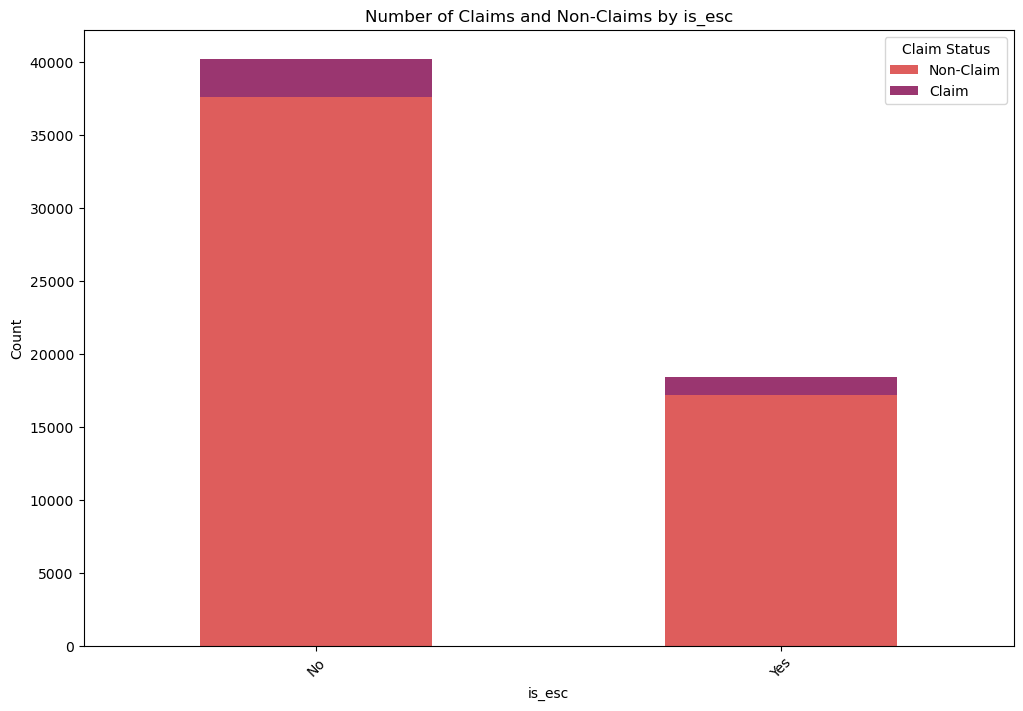

<Figure size 1200x800 with 0 Axes>

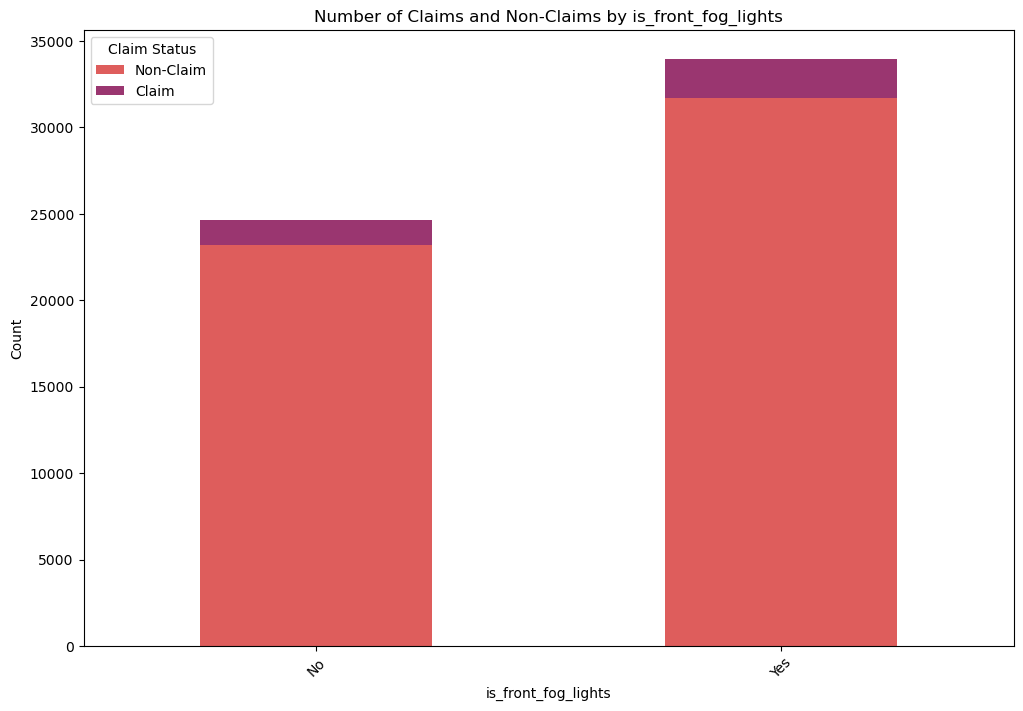

<Figure size 1200x800 with 0 Axes>

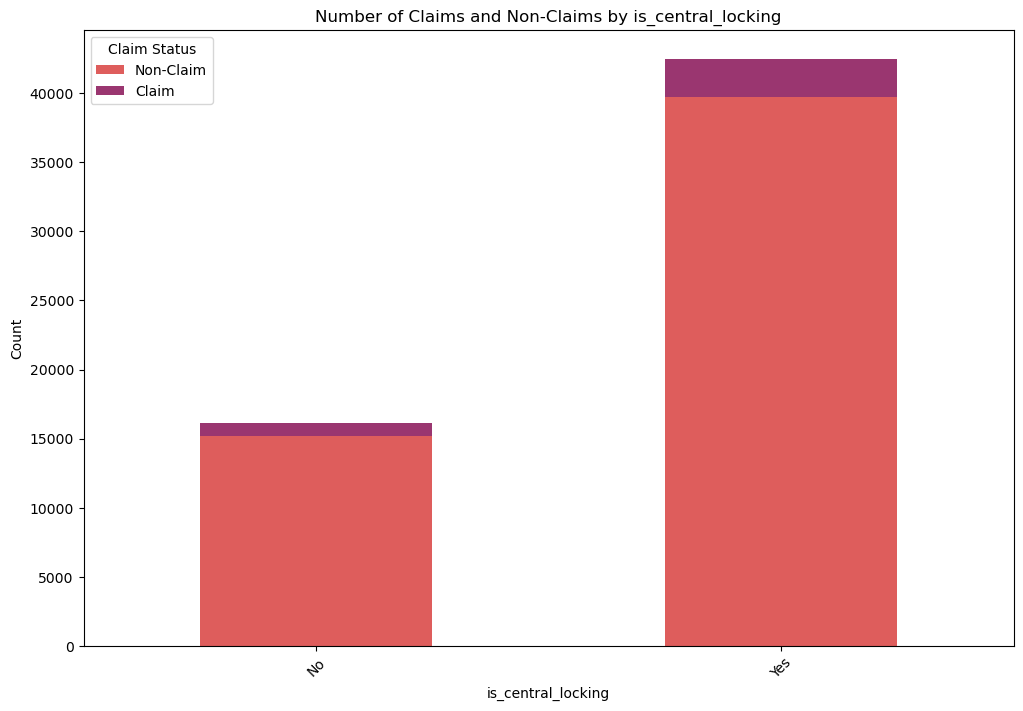

<Figure size 1200x800 with 0 Axes>

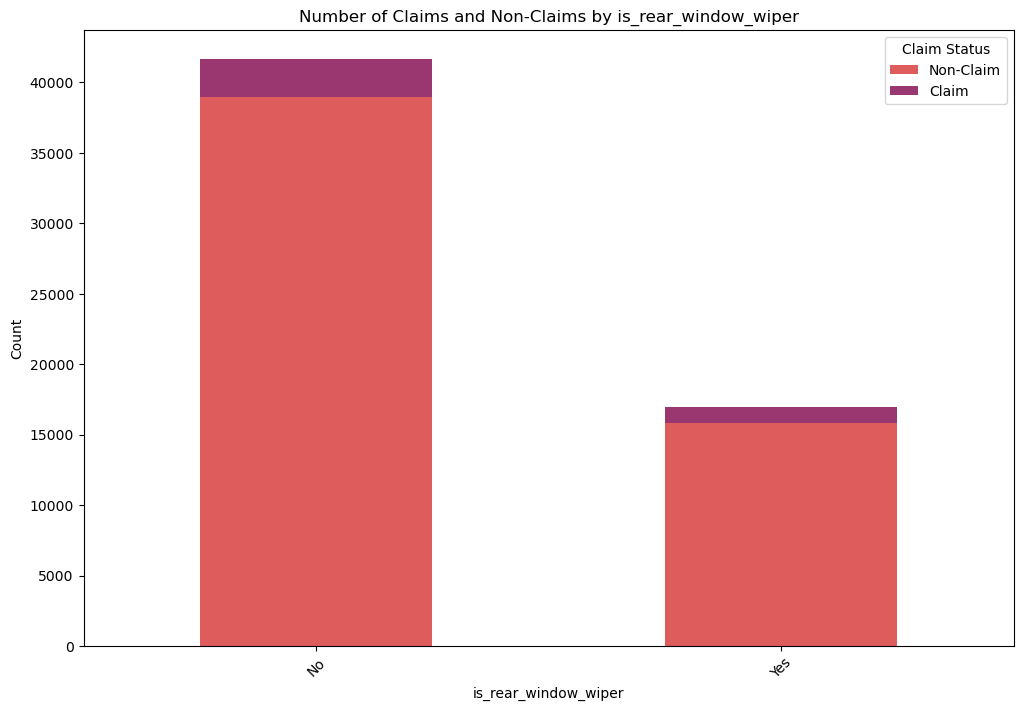

<Figure size 1200x800 with 0 Axes>

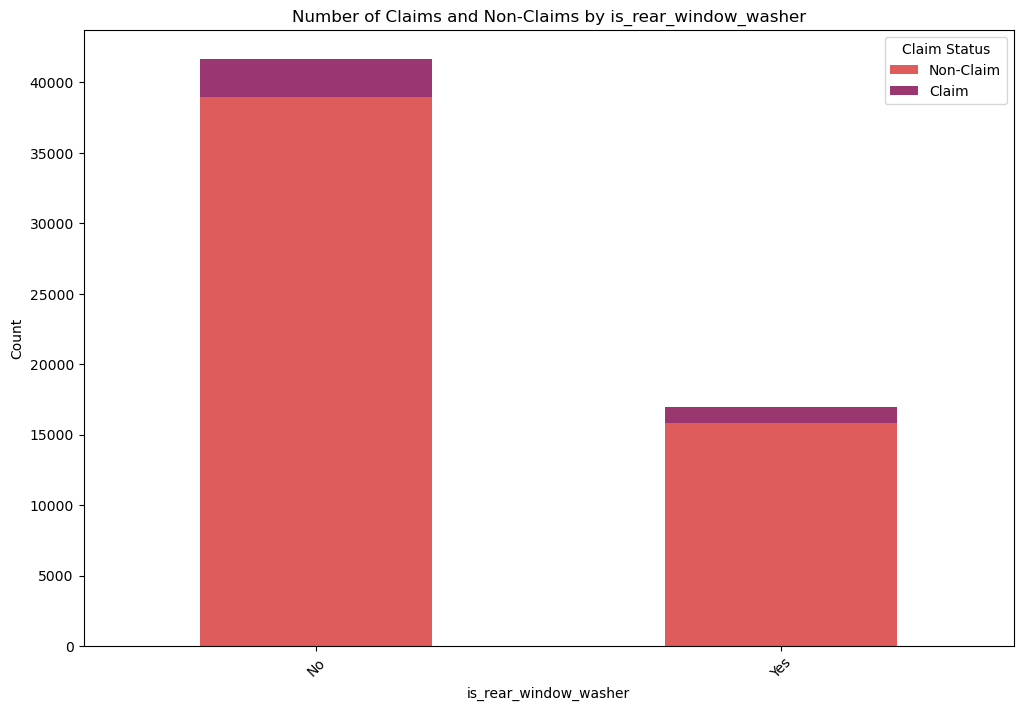

<Figure size 1200x800 with 0 Axes>

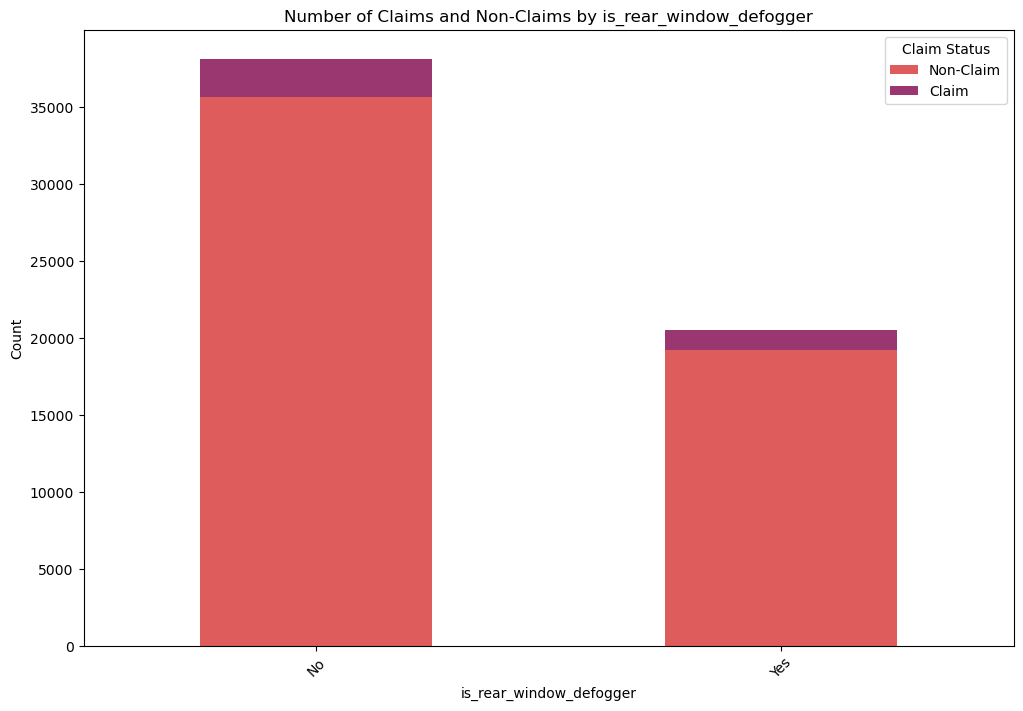

<Figure size 1200x800 with 0 Axes>

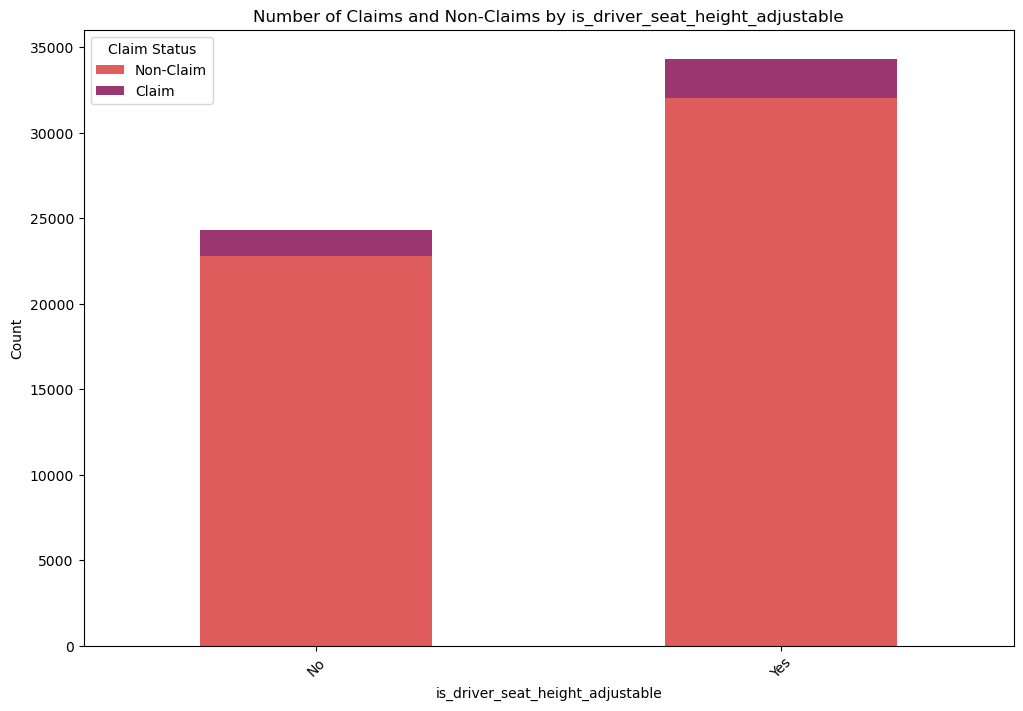

<Figure size 1200x800 with 0 Axes>

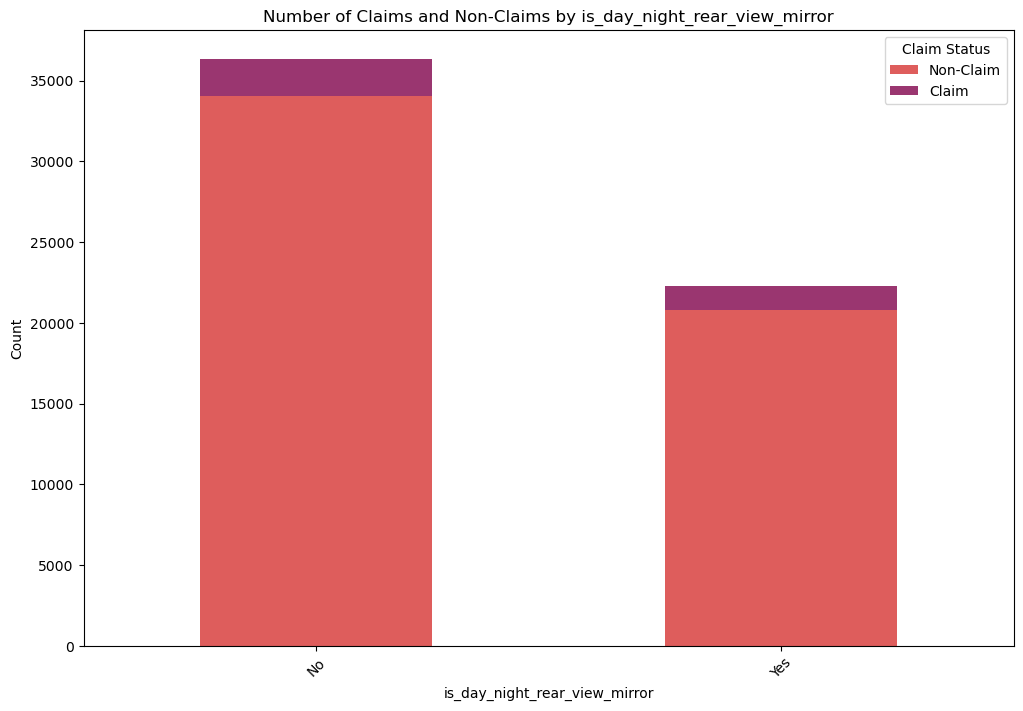

<Figure size 1200x800 with 0 Axes>

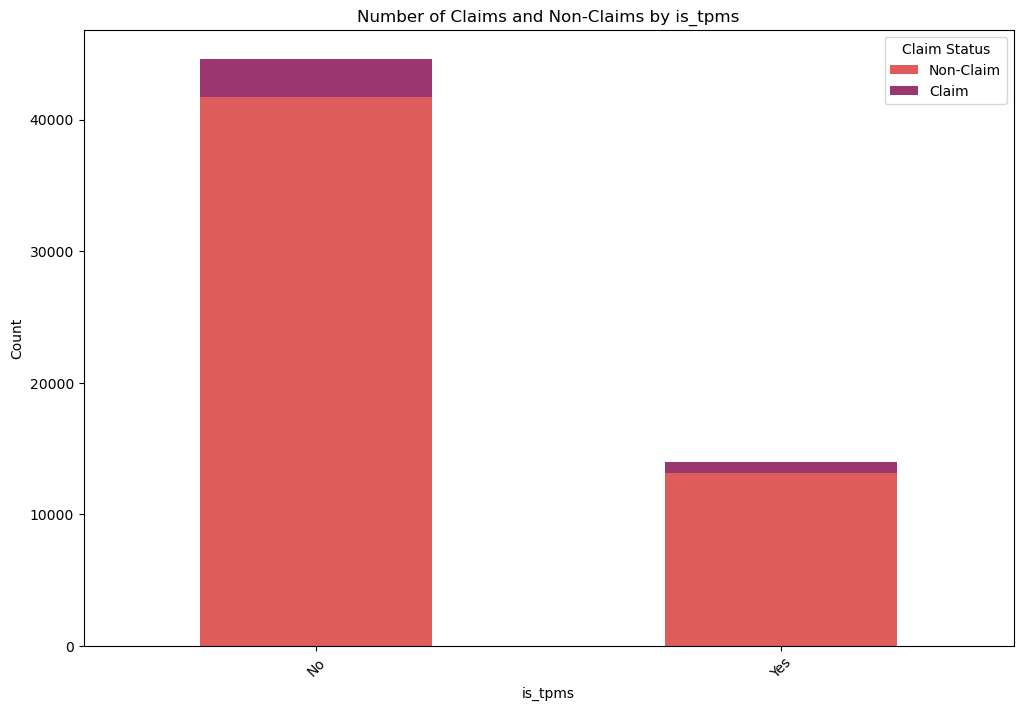

<Figure size 1200x800 with 0 Axes>

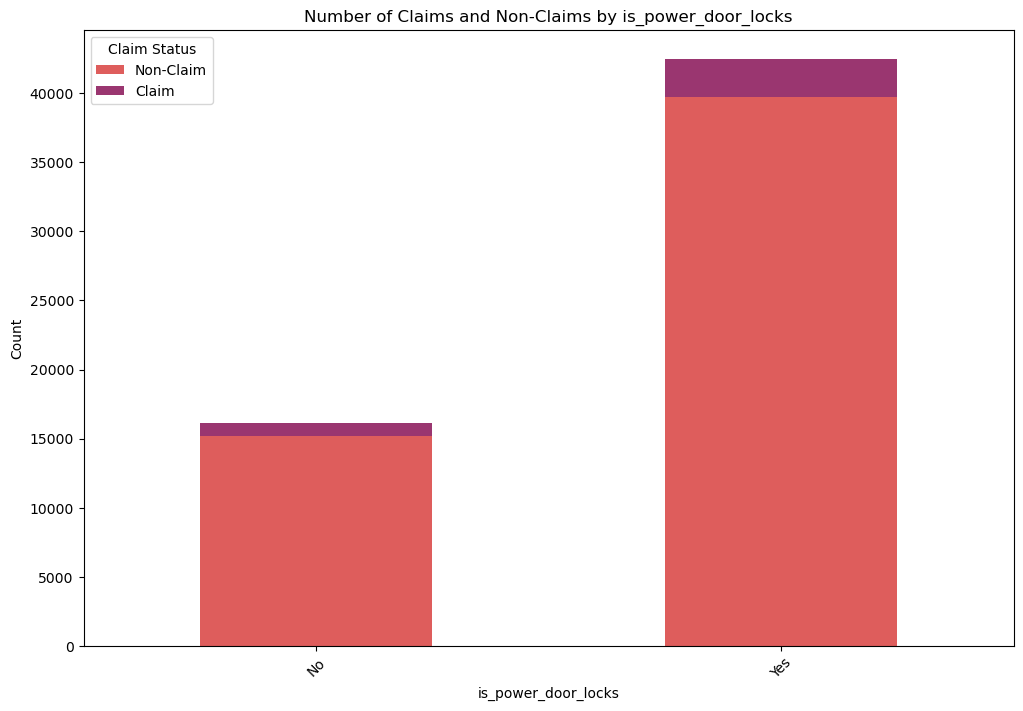

In [31]:
variables = ['is_esc', 'is_front_fog_lights', 'is_central_locking', 
             'is_rear_window_wiper', 'is_rear_window_washer', 
             'is_rear_window_defogger', 'is_driver_seat_height_adjustable', 
             'is_day_night_rear_view_mirror', 'is_tpms', 'is_power_door_locks']

for var in variables:
    df_grouped = df.groupBy("is_claim", var).agg(count("*").alias("count"))

    df_pandas = df_grouped.toPandas()
    df_pivot = df_pandas.pivot(index=var, columns='is_claim', values='count').fillna(0)
    df_pivot.columns = ['Non-Claim', 'Claim']

    #PLOT
    plt.figure(figsize=(12, 8))
    df_pivot.plot(kind='bar', stacked=True, color=colors, figsize=(12, 8))
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'Number of Claims and Non-Claims by {var}')
    plt.xticks(rotation=45)
    plt.legend(title='Claim Status', labels=['Non-Claim', 'Claim'])
    plt.show()

In [38]:
from pyspark.sql.functions import col, count
df_claims = df.filter(col("is_claim") == 1)
df_grouped = df_claims.groupBy("is_esc").agg(count("*").alias("claim_count"))
df_grouped.show()

total_claims = df_claims.count()

df_with_percentage = df_grouped.withColumn("percentage", (col("claim_count") / total_claims) * 100)
df_with_percentage.show()

yes_esc_claims = df_claims.filter(col("is_esc") == 'Yes').count()
no_esc_claims = df_claims.filter(col("is_esc") == 'No').count()

if yes_esc_claims > no_esc_claims:
    print("Kebanyakan mobil yang melakukan klaim memiliki esc.")
else:
    print("Kebanyakan mobil yang melakukan klaim tidak memiliki esc.")

df_no_esc = df.filter(col("is_esc") == 'No')
df_yes_esc = df.filter(col("is_esc") == 'Yes')

total_no_esc = df_no_esc.count()
total_yes_esc = df_yes_esc.count()

if total_no_esc > 0:
    no_esc_claim_percentage = (no_esc_claims / total_no_esc) * 100
    print(f"Persentase klaim untuk mobil dengan No esc dari total mobil dengan tipe ini adalah {no_esc_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan tipe esc No dalam dataset.")

if total_yes_esc > 0:
    yes_esc_claim_percentage = (yes_esc_claims / total_yes_esc) * 100
    print(f"Persentase klaim untuk mobil dengan esc dari total mobil dengan tipe ini adalah {yes_esc_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan tipe esc dalam dataset.")

+------+-----------+
|is_esc|claim_count|
+------+-----------+
|    No|       2551|
|   Yes|       1197|
+------+-----------+

+------+-----------+------------------+
|is_esc|claim_count|        percentage|
+------+-----------+------------------+
|    No|       2551| 68.06296691568838|
|   Yes|       1197|31.937033084311633|
+------+-----------+------------------+

Kebanyakan mobil yang melakukan klaim tidak memiliki esc.
Persentase klaim untuk mobil dengan No esc dari total mobil dengan tipe ini adalah 6.35%.
Persentase klaim untuk mobil dengan esc dari total mobil dengan tipe ini adalah 6.51%.


In [39]:
from pyspark.sql.functions import col, count
df_claims = df.filter(col("is_claim") == 1)
df_grouped = df_claims.groupBy("is_front_fog_lights").agg(count("*").alias("claim_count"))
df_grouped.show()

total_claims = df_claims.count()

df_with_percentage = df_grouped.withColumn("percentage", (col("claim_count") / total_claims) * 100)
df_with_percentage.show()

yes_fog_lights_claims = df_claims.filter(col("is_front_fog_lights") == 'Yes').count()
no_fog_lights_claims = df_claims.filter(col("is_front_fog_lights") == 'No').count()

if yes_fog_lights_claims > no_fog_lights_claims:
    print("Kebanyakan mobil yang melakukan klaim memiliki front fog lights.")
else:
    print("Kebanyakan mobil yang melakukan klaim tidak memiliki front fog lights.")

df_no_fog_lights = df.filter(col("is_front_fog_lights") == 'No')
df_yes_fog_lights = df.filter(col("is_front_fog_lights") == 'Yes')

total_no_fog_lights = df_no_fog_lights.count()
total_yes_fog_lights = df_yes_fog_lights.count()

if total_no_fog_lights > 0:
    no_fog_lights_claim_percentage = (no_fog_lights_claims / total_no_fog_lights) * 100
    print(f"Persentase klaim untuk mobil tanpa front fog lights dari total mobil dengan tipe ini adalah {no_fog_lights_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan tipe NO dalam dataset.")

if total_yes_fog_lights > 0:
    yes_fog_lights_claim_percentage = (yes_fog_lights_claims / total_yes_fog_lights) * 100
    print(f"Persentase klaim untuk mobil dengan front fog lights dari total mobil dengan tipe ini adalah {yes_fog_lights_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan tipe YES dalam dataset.")

+-------------------+-----------+
|is_front_fog_lights|claim_count|
+-------------------+-----------+
|                 No|       1494|
|                Yes|       2254|
+-------------------+-----------+

+-------------------+-----------+------------------+
|is_front_fog_lights|claim_count|        percentage|
+-------------------+-----------+------------------+
|                 No|       1494|39.861259338313765|
|                Yes|       2254| 60.13874066168623|
+-------------------+-----------+------------------+

Kebanyakan mobil yang melakukan klaim memiliki front fog lights.
Persentase klaim untuk mobil tanpa front fog lights dari total mobil dengan tipe ini adalah 6.06%.
Persentase klaim untuk mobil dengan front fog lights dari total mobil dengan tipe ini adalah 6.64%.


In [40]:
from pyspark.sql.functions import col, count
df_claims = df.filter(col("is_claim") == 1)
df_grouped = df_claims.groupBy("is_central_locking").agg(count("*").alias("claim_count"))
df_grouped.show()

total_claims = df_claims.count()

df_with_percentage = df_grouped.withColumn("percentage", (col("claim_count") / total_claims) * 100)
df_with_percentage.show()

yes_central_locking_claims = df_claims.filter(col("is_central_locking") == 'Yes').count()
no_central_locking_claims = df_claims.filter(col("is_central_locking") == 'No').count()

if yes_central_locking_claims > no_central_locking_claims:
    print("Kebanyakan mobil yang melakukan klaim memiliki central locking.")
else:
    print("Kebanyakan mobil yang melakukan klaim tidak memiliki central locking.")

df_no_central_locking = df.filter(col("is_central_locking") == 'No')
df_yes_central_locking = df.filter(col("is_central_locking") == 'Yes')

total_no_central_locking = df_no_central_locking.count()
total_yes_central_locking = df_yes_central_locking.count()

if total_no_central_locking > 0:
    no_central_locking_claim_percentage = (no_central_locking_claims / total_no_central_locking) * 100
    print(f"Persentase klaim untuk mobil tanpa central locking dari total mobil dengan tipe ini adalah {no_central_locking_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan tipe NO dalam dataset.")

if total_yes_central_locking > 0:
    yes_central_locking_claim_percentage = (yes_central_locking_claims / total_yes_central_locking) * 100
    print(f"Persentase klaim untuk mobil dengan central locking dari total mobil dengan tipe ini adalah {yes_central_locking_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan tipe YES dalam dataset.")

+------------------+-----------+
|is_central_locking|claim_count|
+------------------+-----------+
|                No|        991|
|               Yes|       2757|
+------------------+-----------+

+------------------+-----------+-----------------+
|is_central_locking|claim_count|       percentage|
+------------------+-----------+-----------------+
|                No|        991|26.44076840981857|
|               Yes|       2757|73.55923159018143|
+------------------+-----------+-----------------+

Kebanyakan mobil yang melakukan klaim memiliki central locking.
Persentase klaim untuk mobil tanpa central locking dari total mobil dengan tipe ini adalah 6.13%.
Persentase klaim untuk mobil dengan central locking dari total mobil dengan tipe ini adalah 6.50%.


In [32]:
from pyspark.sql.functions import col, count
df_claims = df.filter(col("is_claim") == 1)
df_grouped = df_claims.groupBy("is_rear_window_wiper").agg(count("*").alias("claim_count"))
df_grouped.show()

total_claims = df_claims.count()

df_with_percentage = df_grouped.withColumn("percentage", (col("claim_count") / total_claims) * 100)
df_with_percentage.show()

yes_wwiper_claims = df_claims.filter(col("is_rear_window_wiper") == 'Yes').count()
no_wwiper_claims = df_claims.filter(col("is_rear_window_wiper") == 'No').count()

if yes_wwiper_claims > no_wwiper_claims:
    print("Kebanyakan mobil yang melakukan klaim memiliki rear window wiper.")
else:
    print("Kebanyakan mobil yang melakukan klaim tidak memiliki rear window wiper.")

df_no_wwiper = df.filter(col("is_rear_window_wiper") == 'No')
df_yes_wwiper = df.filter(col("is_rear_window_wiper") == 'Yes')

total_no_wwiper = df_no_wwiper.count()
total_yes_wwiper = df_yes_wwiper.count()

if total_no_wwiper > 0:
    no_wwiper_claim_percentage = (no_wwiper_claims / total_no_wwiper) * 100
    print(f"Persentase klaim untuk mobil tanpa rear window wiper dari total mobil dengan tipe ini adalah {no_wwiper_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan tipe NO dalam dataset.")

if total_yes_wwiper > 0:
    yes_wwiper_claim_percentage = (yes_wwiper_claims / total_yes_wwiper) * 100
    print(f"Persentase klaim untuk mobil dengan rear window wiper dari total mobil dengan tipe ini adalah {yes_wwiper_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan tipe YES dalam dataset.")

+--------------------+-----------+
|is_rear_window_wiper|claim_count|
+--------------------+-----------+
|                  No|       2646|
|                 Yes|       1102|
+--------------------+-----------+

+--------------------+-----------+------------------+
|is_rear_window_wiper|claim_count|        percentage|
+--------------------+-----------+------------------+
|                  No|       2646| 70.59765208110993|
|                 Yes|       1102|29.402347918890076|
+--------------------+-----------+------------------+

Kebanyakan mobil yang melakukan klaim tidak memiliki rear window wiper.
Persentase klaim untuk mobil tanpa rear window wiper dari total mobil dengan tipe ini adalah 6.36%.
Persentase klaim untuk mobil dengan rear window wiper dari total mobil dengan tipe ini adalah 6.50%.


In [37]:
from pyspark.sql.functions import col, count
df_claims = df.filter(col("is_claim") == 1)
df_grouped = df_claims.groupBy("is_rear_window_washer").agg(count("*").alias("claim_count"))
df_grouped.show()

total_claims = df_claims.count()

df_with_percentage = df_grouped.withColumn("percentage", (col("claim_count") / total_claims) * 100)
df_with_percentage.show()

yes_wwasher_claims = df_claims.filter(col("is_rear_window_washer") == 'Yes').count()
no_wwasher_claims = df_claims.filter(col("is_rear_window_washer") == 'No').count()

if yes_wwasher_claims > no_wwasher_claims:
    print("Kebanyakan mobil yang melakukan klaim memiliki rear window washer.")
else:
    print("Kebanyakan mobil yang melakukan klaim tidak memiliki rear window washer.")

df_no_wwasher = df.filter(col("is_rear_window_washer") == 'No')
df_yes_wwasher = df.filter(col("is_rear_window_washer") == 'Yes')

total_no_wwasher = df_no_wwasher.count()
total_yes_wwasher = df_yes_wwasher.count()

if total_no_wwasher > 0:
    no_wwasher_claim_percentage = (no_wwasher_claims / total_no_wwasher) * 100
    print(f"Persentase klaim untuk mobil tanpa rear window washer dari total mobil dengan tipe ini adalah {no_wwasher_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan tipe NO dalam dataset.")

if total_yes_wwasher > 0:
    yes_wwasher_claim_percentage = (yes_wwasher_claims / total_yes_wwasher) * 100
    print(f"Persentase klaim untuk mobil dengan rear window washer dari total mobil dengan tipe ini adalah {yes_wwasher_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan tipe YES dalam dataset.")

+---------------------+-----------+
|is_rear_window_washer|claim_count|
+---------------------+-----------+
|                   No|       2646|
|                  Yes|       1102|
+---------------------+-----------+

+---------------------+-----------+------------------+
|is_rear_window_washer|claim_count|        percentage|
+---------------------+-----------+------------------+
|                   No|       2646| 70.59765208110993|
|                  Yes|       1102|29.402347918890076|
+---------------------+-----------+------------------+

Kebanyakan mobil yang melakukan klaim tidak memiliki rear window washer.
Persentase klaim untuk mobil tanpa rear window washer dari total mobil dengan tipe ini adalah 6.36%.
Persentase klaim untuk mobil dengan rear window washer dari total mobil dengan tipe ini adalah 6.50%.


In [38]:
from pyspark.sql.functions import col, count
df_claims = df.filter(col("is_claim") == 1)
df_grouped = df_claims.groupBy("is_rear_window_defogger").agg(count("*").alias("claim_count"))
df_grouped.show()

total_claims = df_claims.count()

df_with_percentage = df_grouped.withColumn("percentage", (col("claim_count") / total_claims) * 100)
df_with_percentage.show()

yes_wdefogger_claims = df_claims.filter(col("is_rear_window_defogger") == 'Yes').count()
no_wdefogger_claims = df_claims.filter(col("is_rear_window_defogger") == 'No').count()

if yes_wdefogger_claims > no_wdefogger_claims:
    print("Kebanyakan mobil yang melakukan klaim memiliki rear window defogger.")
else:
    print("Kebanyakan mobil yang melakukan klaim tidak memiliki rear window defogger.")

df_no_wdefogger = df.filter(col("is_rear_window_defogger") == 'No')
df_yes_wdefogger = df.filter(col("is_rear_window_defogger") == 'Yes')

total_no_wdefogger = df_no_wdefogger.count()
total_yes_wdefogger = df_yes_wdefogger.count()

if total_no_wdefogger > 0:
    no_wdefogger_claim_percentage = (no_wdefogger_claims / total_no_wdefogger) * 100
    print(f"Persentase klaim untuk mobil tanpa rear window defogger dari total mobil dengan tipe ini adalah {no_wdefogger_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan tipe NO dalam dataset.")

if total_yes_wdefogger > 0:
    yes_wdefogger_claim_percentage = (yes_wdefogger_claims / total_yes_wdefogger) * 100
    print(f"Persentase klaim untuk mobil dengan rear window defogger dari total mobil dengan tipe ini adalah {yes_wdefogger_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan tipe YES dalam dataset.")

+-----------------------+-----------+
|is_rear_window_defogger|claim_count|
+-----------------------+-----------+
|                     No|       2418|
|                    Yes|       1330|
+-----------------------+-----------+

+-----------------------+-----------+-----------------+
|is_rear_window_defogger|claim_count|       percentage|
+-----------------------+-----------+-----------------+
|                     No|       2418|64.51440768409819|
|                    Yes|       1330|35.48559231590181|
+-----------------------+-----------+-----------------+

Kebanyakan mobil yang melakukan klaim tidak memiliki rear window defogger.
Persentase klaim untuk mobil tanpa rear window defogger dari total mobil dengan tipe ini adalah 6.35%.
Persentase klaim untuk mobil dengan rear window defogger dari total mobil dengan tipe ini adalah 6.48%.


In [41]:
from pyspark.sql.functions import col, count
df_claims = df.filter(col("is_claim") == 1)
df_grouped = df_claims.groupBy("is_driver_seat_height_adjustable").agg(count("*").alias("claim_count"))
df_grouped.show()

total_claims = df_claims.count()

df_with_percentage = df_grouped.withColumn("percentage", (col("claim_count") / total_claims) * 100)
df_with_percentage.show()

yes_driver_seat_height_claims = df_claims.filter(col("is_driver_seat_height_adjustable") == 'Yes').count()
no_driver_seat_height_claims = df_claims.filter(col("is_driver_seat_height_adjustable") == 'No').count()

if yes_driver_seat_height_claims > no_driver_seat_height_claims:
    print("Kebanyakan mobil yang melakukan klaim memiliki driver seat height adjustable.")
else:
    print("Kebanyakan mobil yang melakukan klaim tidak memiliki driver seat height adjustable.")

df_no_driver_seat_height = df.filter(col("is_driver_seat_height_adjustable") == 'No')
df_yes_driver_seat_height = df.filter(col("is_driver_seat_height_adjustable") == 'Yes')

total_no_driver_seat_height = df_no_driver_seat_height.count()
total_yes_driver_seat_height = df_yes_driver_seat_height.count()

if total_no_driver_seat_height > 0:
    no_driver_seat_height_claim_percentage = (no_driver_seat_height_claims / total_no_driver_seat_height) * 100
    print(f"Persentase klaim untuk mobil tanpa driver seat height adjustable dari total mobil dengan tipe ini adalah {no_driver_seat_height_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan tipe NO dalam dataset.")

if total_yes_driver_seat_height > 0:
    yes_driver_seat_height_claim_percentage = (yes_driver_seat_height_claims / total_yes_driver_seat_height) * 100
    print(f"Persentase klaim untuk mobil dengan driver seat height adjustable dari total mobil dengan tipe ini adalah {yes_driver_seat_height_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan tipe YES disc dalam dataset.")

+--------------------------------+-----------+
|is_driver_seat_height_adjustable|claim_count|
+--------------------------------+-----------+
|                              No|       1479|
|                             Yes|       2269|
+--------------------------------+-----------+

+--------------------------------+-----------+-----------------+
|is_driver_seat_height_adjustable|claim_count|       percentage|
+--------------------------------+-----------+-----------------+
|                              No|       1479|39.46104589114194|
|                             Yes|       2269|60.53895410885806|
+--------------------------------+-----------+-----------------+

Kebanyakan mobil yang melakukan klaim memiliki driver seat height adjustable.
Persentase klaim untuk mobil tanpa driver seat height adjustable dari total mobil dengan tipe ini adalah 6.09%.
Persentase klaim untuk mobil dengan driver seat height adjustable dari total mobil dengan tipe ini adalah 6.62%.


In [42]:
from pyspark.sql.functions import col, count
df_claims = df.filter(col("is_claim") == 1)
df_grouped = df_claims.groupBy("is_day_night_rear_view_mirror").agg(count("*").alias("claim_count"))
df_grouped.show()

total_claims = df_claims.count()

df_with_percentage = df_grouped.withColumn("percentage", (col("claim_count") / total_claims) * 100)
df_with_percentage.show()

yes_day_night_rear_view_mirror_claims = df_claims.filter(col("is_day_night_rear_view_mirror") == 'Yes').count()
no_day_night_rear_view_mirror_claims = df_claims.filter(col("is_day_night_rear_view_mirror") == 'No').count()

if yes_day_night_rear_view_mirror_claims > no_day_night_rear_view_mirror_claims:
    print("Kebanyakan mobil yang melakukan klaim memiliki day night rear view mirror.")
else:
    print("Kebanyakan mobil yang melakukan klaim tidak memiliki day night rear view mirror.")

df_no_day_night_rear_view_mirror = df.filter(col("is_day_night_rear_view_mirror") == 'No')
df_yes_day_night_rear_view_mirror = df.filter(col("is_day_night_rear_view_mirror") == 'Yes')

total_no_day_night_rear_view_mirror = df_no_day_night_rear_view_mirror.count()
total_yes_day_night_rear_view_mirror = df_yes_day_night_rear_view_mirror.count()

if total_no_day_night_rear_view_mirror > 0:
    no_day_night_rear_view_mirror_claim_percentage = (no_day_night_rear_view_mirror_claims / total_no_day_night_rear_view_mirror) * 100
    print(f"Persentase klaim untuk mobil tanpa day night rear view mirror dari total mobil dengan tipe ini adalah {no_day_night_rear_view_mirror_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan tipe NO dalam dataset.")

if total_yes_day_night_rear_view_mirror > 0:
    yes_day_night_rear_view_mirror_claim_percentage = (yes_day_night_rear_view_mirror_claims / total_yes_day_night_rear_view_mirror) * 100
    print(f"Persentase klaim untuk mobil dengan day night rear view mirror dari total mobil dengan tipe ini adalah {yes_day_night_rear_view_mirror_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan tipe YES disc dalam dataset.")

+-----------------------------+-----------+
|is_day_night_rear_view_mirror|claim_count|
+-----------------------------+-----------+
|                           No|       2267|
|                          Yes|       1481|
+-----------------------------+-----------+

+-----------------------------+-----------+-----------------+
|is_day_night_rear_view_mirror|claim_count|       percentage|
+-----------------------------+-----------+-----------------+
|                           No|       2267|60.48559231590181|
|                          Yes|       1481|39.51440768409819|
+-----------------------------+-----------+-----------------+

Kebanyakan mobil yang melakukan klaim tidak memiliki day night rear view mirror.
Persentase klaim untuk mobil tanpa day night rear view mirror dari total mobil dengan tipe ini adalah 6.24%.
Persentase klaim untuk mobil dengan day night rear view mirror dari total mobil dengan tipe ini adalah 6.65%.


In [43]:
df_claims = df.filter(col("is_claim") == 1)
df_grouped = df_claims.groupBy("is_tpms").agg(count("*").alias("claim_count"))
df_grouped.show()

total_claims = df_claims.count()

df_with_percentage = df_grouped.withColumn("percentage", (col("claim_count") / total_claims) * 100)
df_with_percentage.show()

yes_tpms_claims = df_claims.filter(col("is_tpms") == 'Yes').count()
no_tpms_claims = df_claims.filter(col("is_tpms") == 'No').count()

if yes_tpms_claims > no_tpms_claims:
    print("Kebanyakan mobil yang melakukan klaim memiliki tpms.")
else:
    print("Kebanyakan mobil yang melakukan klaim tidak memiliki tpsm.")

df_no_fog_lights = df.filter(col("is_tpms") == 'No')
df_yes_fog_lights = df.filter(col("is_tpms") == 'Yes')

total_no_tpms = df_no_fog_lights.count()
total_yes_tpms = df_yes_fog_lights.count()

if total_no_tpms > 0:
    no_tpms_claim_percentage = (no_tpms_claims / total_no_tpms) * 100
    print(f"Persentase klaim untuk mobil tanpa tpms dari total mobil dengan tipe ini adalah {no_tpms_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan tipe NO dalam dataset.")

if total_yes_tpms > 0:
    yes_tpms_claim_percentage = (yes_tpms_claims / total_yes_tpms) * 100
    print(f"Persentase klaim untuk mobil dengan tpms dari total mobil dengan tipe ini adalah {yes_tpms_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan tipe YES dalam dataset.")

+-------+-----------+
|is_tpms|claim_count|
+-------+-----------+
|     No|       2847|
|    Yes|        901|
+-------+-----------+

+-------+-----------+-----------------+
|is_tpms|claim_count|       percentage|
+-------+-----------+-----------------+
|     No|       2847|75.96051227321237|
|    Yes|        901|24.03948772678762|
+-------+-----------+-----------------+

Kebanyakan mobil yang melakukan klaim tidak memiliki tpsm.
Persentase klaim untuk mobil tanpa tpms dari total mobil dengan tipe ini adalah 6.39%.
Persentase klaim untuk mobil dengan tpms dari total mobil dengan tipe ini adalah 6.43%.


In [44]:
df_claims = df.filter(col("is_claim") == 1)
df_grouped = df_claims.groupBy("is_power_door_locks").agg(count("*").alias("claim_count"))
df_grouped.show()

total_claims = df_claims.count()

df_with_percentage = df_grouped.withColumn("percentage", (col("claim_count") / total_claims) * 100)
df_with_percentage.show()

yes_plock_claims = df_claims.filter(col("is_power_door_locks") == 'Yes').count()
no_plock_claims = df_claims.filter(col("is_power_door_locks") == 'No').count()

if yes_plock_claims > no_plock_claims:
    print("Kebanyakan mobil yang melakukan klaim memiliki power door locks.")
else:
    print("Kebanyakan mobil yang melakukan klaim tidak memiliki power door locks.")

df_no_plock = df.filter(col("is_power_door_locks") == 'No')
df_yes_plock = df.filter(col("is_power_door_locks") == 'Yes')

total_no_plock = df_no_plock.count()
total_yes_plock = df_yes_plock.count()

if total_no_plock > 0:
    no_plock_claim_percentage = (no_plock_claims / total_no_plock) * 100
    print(f"Persentase klaim untuk mobil tanpa power door locks dari total mobil dengan tipe ini adalah {no_plock_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan tipe NO dalam dataset.")

if total_yes_plock > 0:
    yes_plock_claim_percentage = (yes_plock_claims / total_yes_plock) * 100
    print(f"Persentase klaim untuk mobil dengan power door locks dari total mobil dengan tipe ini adalah {yes_plock_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan tipe YES dalam dataset.")

+-------------------+-----------+
|is_power_door_locks|claim_count|
+-------------------+-----------+
|                 No|        991|
|                Yes|       2757|
+-------------------+-----------+

+-------------------+-----------+-----------------+
|is_power_door_locks|claim_count|       percentage|
+-------------------+-----------+-----------------+
|                 No|        991|26.44076840981857|
|                Yes|       2757|73.55923159018143|
+-------------------+-----------+-----------------+

Kebanyakan mobil yang melakukan klaim memiliki power door locks.
Persentase klaim untuk mobil tanpa power door locks dari total mobil dengan tipe ini adalah 6.13%.
Persentase klaim untuk mobil dengan power door locks dari total mobil dengan tipe ini adalah 6.50%.


In [45]:
df_claims = df.filter(col("is_claim") == 1)
df_grouped = df_claims.groupBy("airbags").agg(count("*").alias("claim_count"))
df_grouped.show()

total_claims = df_claims.count()

df_with_percentage = df_grouped.withColumn("percentage", (col("claim_count") / total_claims) * 100)
df_with_percentage.show()

air1_claims = df_claims.filter(col("airbags") == 1).count()
air2_claims = df_claims.filter(col("airbags") == 2).count()
air6_claims = df_claims.filter(col("airbags") == 6).count()

if air1_claims > air2_claims & air1_claims > air6_claims:
    print("Kebanyakan mobil yang melakukan klaim memiliki 1 buah airbags.")
elif air2_claims > air2_claims & air2_claims > air6_claims:
    print("Kebanyakan mobil yang melakukan klaim memiliki 2 buah airbags.")
else:
    print("Kebanyakan mobil yang melakukan klaim memiliki 6 buah airbags.")

df_1air = df.filter(col("airbags") == 1)
df_2air = df.filter(col("airbags") == 2)
df_6air = df.filter(col("airbags") == 6)

total_1air = df_1air.count()
total_2air = df_2air.count()
total_6air = df_6air.count()

if total_1air > 0:
    aira_claim_percentage = (air1_claims / total_1air) * 100
    print(f"Persentase mobil dengan 1 airbags yang melakukan klaim adalah {aira_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan tipe NO dalam dataset.")

if total_2air > 0:
    air2_claim_percentage = (air2_claims / total_2air) * 100
    print(f"Persentase mobil dengan 2 airbags yang melakukan klaim adalah {air2_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan tipe YES dalam dataset.")

if total_6air > 0:
    air6_claim_percentage = (air6_claims / total_6air) * 100
    print(f"Persentase mobil dengan 6 airbags yang melakukan klaim adalah {air6_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan tipe YES dalam dataset.")

+-------+-----------+
|airbags|claim_count|
+-------+-----------+
|      6|       1102|
|      1|         73|
|      2|       2573|
+-------+-----------+

+-------+-----------+------------------+
|airbags|claim_count|        percentage|
+-------+-----------+------------------+
|      6|       1102|29.402347918890076|
|      1|         73|1.9477054429028817|
|      2|       2573| 68.64994663820706|
+-------+-----------+------------------+

Kebanyakan mobil yang melakukan klaim memiliki 6 buah airbags.
Persentase mobil dengan 1 airbags yang melakukan klaim adalah 6.04%.
Persentase mobil dengan 2 airbags yang melakukan klaim adalah 6.36%.
Persentase mobil dengan 6 airbags yang melakukan klaim adalah 6.50%.


+----------+-----+
|age_of_car|count|
+----------+-----+
|      0.07|  206|
|      0.32|    2|
|      0.03|  272|
|      0.11|  166|
|       0.3|    1|
|      0.14|  124|
|      0.25|    2|
|         0|  559|
|      0.06|  206|
|       0.2|   15|
|      0.21|   10|
|      0.15|   87|
|      0.35|    1|
|      0.08|  174|
|      0.02|  313|
|      0.12|  153|
|      0.22|    9|
|      0.33|    2|
|      0.16|   62|
|      0.05|  226|
+----------+-----+
only showing top 20 rows

+----------+------------+----------+------------------+
|age_of_car|total_claims|total_rows|  percentage_claim|
+----------+------------+----------+------------------+
|      0.07|         206|      2888| 7.132963988919667|
|      0.32|           2|        13|15.384615384615385|
|      0.11|         166|      2442| 6.797706797706797|
|      0.03|         272|      4415| 6.160815402038505|
|       0.3|           1|        32|             3.125|
|      0.14|         124|      2151| 5.764760576476058|
|      0.25|  

C:\Users\Evelyn\AppData\Local\Temp\ipykernel_22664\491863217.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


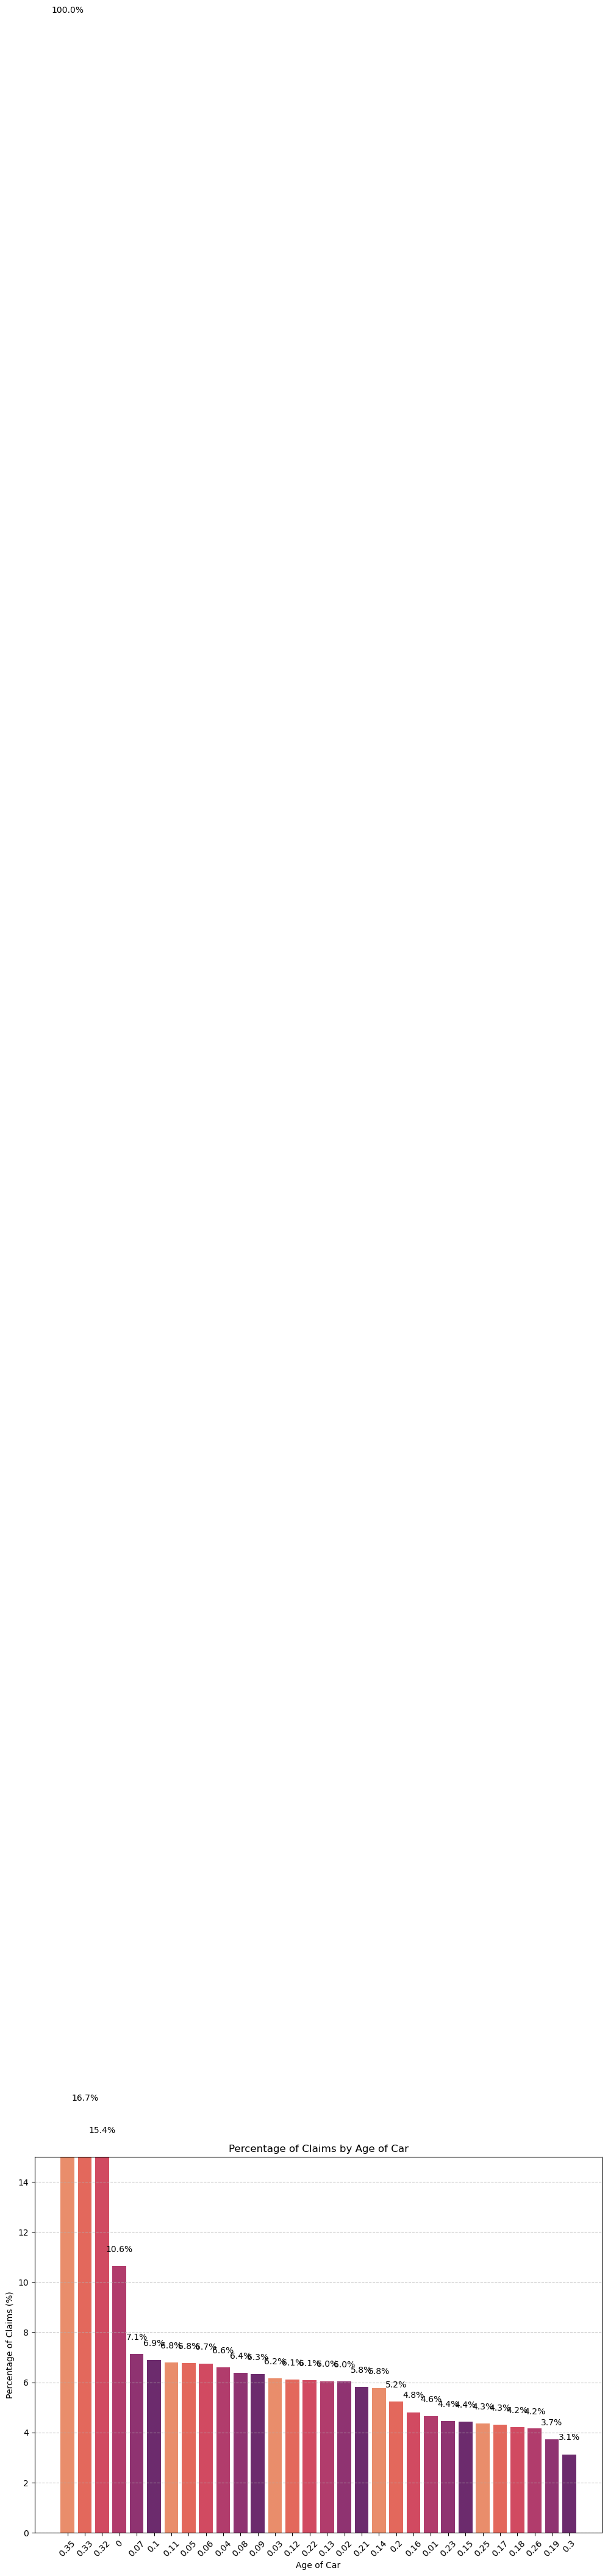

In [23]:
df_filtered = df.filter(col('is_claim') == 1)

df_selected = df_filtered.select('age_of_car', 'is_claim')

df_grouped = df_selected.groupBy('age_of_car').count()

df_grouped.show()

total_claims_df = df_grouped.withColumnRenamed('count', 'total_claims')
total_rows_df = df.groupBy('age_of_car').count().withColumnRenamed('count', 'total_rows')

df_combined = total_claims_df.join(total_rows_df, 'age_of_car')

df_percentage = df_combined.withColumn('percentage_claim', col('total_claims') / col('total_rows') * 100)

df_percentage.show()

df_sorted = df_percentage.orderBy('percentage_claim', ascending=False).toPandas()

plt.figure(figsize=(12, 8))
bars = plt.bar(df_sorted['age_of_car'], df_sorted['percentage_claim'], color=colors)
plt.xlabel('Age of Car')
plt.ylabel('Percentage of Claims (%)')
plt.title('Percentage of Claims by Age of Car')
plt.xticks(rotation=45)
plt.ylim(0, 15)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [39]:
df_claims = df.filter(col("is_claim") == 1)
df_grouped = df_claims.groupBy("is_parking_camera").agg(count("*").alias("claim_count"))
df_grouped.show()

total_claims = df_claims.count()

df_with_percentage = df_grouped.withColumn("percentage", (col("claim_count") / total_claims) * 100)
df_with_percentage.show()

yes_parking_camera_claims = df_claims.filter(col("is_parking_camera") == 'Yes').count()
no_parking_camera_claims = df_claims.filter(col("is_parking_camera") == 'No').count()

if yes_parking_camera_claims > no_parking_camera_claims:
    print("Kebanyakan mobil yang melakukan klaim memiliki parking camera.")
else:
    print("Kebanyakan mobil yang melakukan klaim tidak memiliki parking camera.")

df_no_parking_camera = df.filter(col("is_parking_camera") == 'No')
df_yes_parking_camera = df.filter(col("is_parking_camera") == 'Yes')

total_no_parking_camera = df_no_parking_camera.count()
total_yes_parking_camera = df_yes_parking_camera.count()

if total_no_parking_camera > 0:
    no_parking_camera_claim_percentage = (no_parking_camera_claims / total_no_parking_camera) * 100
    print(f"Persentase klaim untuk mobil tanpa parking camera dari total mobil dengan tipe ini adalah {no_parking_camera_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan tipe NO dalam dataset.")

if total_yes_parking_camera > 0:
    yes_parking_camera_claim_percentage = (yes_parking_camera_claims / total_yes_parking_camera) * 100
    print(f"Persentase klaim untuk mobil dengan parking camera dari total mobil dengan tipe ini adalah {yes_parking_camera_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan tipe YES dalam dataset.")

+-----------------+-----------+
|is_parking_camera|claim_count|
+-----------------+-----------+
|               No|       2290|
|              Yes|       1458|
+-----------------+-----------+

+-----------------+-----------+------------------+
|is_parking_camera|claim_count|        percentage|
+-----------------+-----------+------------------+
|               No|       2290|61.099252934898615|
|              Yes|       1458|38.900747065101385|
+-----------------+-----------+------------------+

Kebanyakan mobil yang melakukan klaim tidak memiliki parking camera.
Persentase klaim untuk mobil tanpa parking camera dari total mobil dengan tipe ini adalah 6.41%.
Persentase klaim untuk mobil dengan parking camera dari total mobil dengan tipe ini adalah 6.37%.


# UBAH DATA MENJADI ANGKA

In [46]:
# Kolom yang akan diubah tipe datanya
columns = ['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 
                      'is_parking_camera', 'is_front_fog_lights', 'is_rear_window_wiper', 
                      'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 
                      'is_power_door_locks', 'is_central_locking', 'is_power_steering', 
                      'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 
                      'is_ecw', 'is_speed_alert']
# Mengubah nilai 'yes' menjadi 1 dan 'no' menjadi 0
for column in columns:
    df = df.withColumn(column, when(col(column) == 'Yes', 1).otherwise(0))
    dt = dt.withColumn(column, when(col(column) == 'Yes', 1).otherwise(0))


# Daftar kolom yang ingin Anda ubah menjadi float
columns = ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'turning_radius']
# Loop melalui setiap kolom dan mengonversi tipe datanya menjadi float
for column in columns:
    df = df.withColumn(column, col(column).cast('float'))
    dt = dt.withColumn(column, col(column).cast('float'))


# Daftar kolom yang ingin Anda ubah menjadi integer
columns = ['population_density', 'make','airbags', 'displacement','cylinder', 'gear_box', 'length', 'width', 'height', 'gross_weight', 'ncap_rating', 'is_claim']
# Loop melalui setiap kolom dan mengonversi tipe datanya menjadi integer
for column in columns:
    df = df.withColumn(column, col(column).cast('int'))
    if column != 'is_claim':
        dt = dt.withColumn(column, col(column).cast('int'))


# Mengubah nilai dalam kolom 'area_cluster'
for i in range(1, 23):
    cluster_name = 'C' + str(i)
    df = df.withColumn('area_cluster', regexp_replace(col('area_cluster'), cluster_name, str(i)))
    dt = dt.withColumn('area_cluster', regexp_replace(col('area_cluster'), cluster_name, str(i)))

df = df.withColumn('area_cluster', col('area_cluster').cast('int'))
dt = dt.withColumn('area_cluster', col('area_cluster').cast('int'))


# Mengubah nilai dalam kolom 'segment'
df = df.withColumn('segment',
                   when(col('segment') == 'A', 1.0)
                   .when(col('segment') == 'B1', 2.1)
                   .when(col('segment') == 'B2', 2.2)
                   .when(col('segment') == 'C1', 3.1)
                   .when(col('segment') == 'C2', 3.2)
                   .when(col('segment') == 'Utility', 4.0))
dt = dt.withColumn('segment',
                   when(col('segment') == 'A', 1.0)
                   .when(col('segment') == 'B1', 2.1)
                   .when(col('segment') == 'B2', 2.2)
                   .when(col('segment') == 'C1', 3.1)
                   .when(col('segment') == 'C2', 3.2)
                   .when(col('segment') == 'Utility', 4.0))


# Mengubah nilai dalam kolom 'model'
for i in range(1, 12):
    cluster_name = 'M' + str(i)
    df = df.withColumn('model', regexp_replace(col('model'), cluster_name, str(i)))
    dt = dt.withColumn('model', regexp_replace(col('model'), cluster_name, str(i)))

df = df.withColumn('model', col('model').cast('int'))
dt = dt.withColumn('model', col('model').cast('int'))


# Mengubah nilai dalam kolom 'fuel_type'
df = df.withColumn('fuel_type',
                   when(col('fuel_type') == 'CNG', 1)
                   .when(col('fuel_type') == 'Diesel', 2)
                   .when(col('fuel_type') == 'Petrol', 3))
dt = dt.withColumn('fuel_type',
                   when(col('fuel_type') == 'CNG', 1)
                   .when(col('fuel_type') == 'Diesel', 2)
                   .when(col('fuel_type') == 'Petrol', 3))


# Mengubah nilai dalam kolom 'rear_brakes_type'
df = df.withColumn('rear_brakes_type',
                   when(col('rear_brakes_type') == 'Disc', 1)
                   .when(col('rear_brakes_type') == 'Drum', 2))
dt = dt.withColumn('rear_brakes_type',
                   when(col('rear_brakes_type') == 'Disc', 1)
                   .when(col('rear_brakes_type') == 'Drum', 2))


# Mengubah nilai dalam kolom 'transmission_type'
df = df.withColumn('transmission_type',
                   when(col('transmission_type') == 'Automatic', 1)
                   .when(col('transmission_type') == 'Manual', 2))
dt = dt.withColumn('transmission_type',
                   when(col('transmission_type') == 'Automatic', 1)
                   .when(col('transmission_type') == 'Manual', 2))


# Mengubah nilai dalam kolom 'steering_type'
df = df.withColumn('steering_type',
                   when(col('steering_type') == 'Electric', 1)
                   .when(col('steering_type') == 'Manual', 2)
                   .when(col('steering_type') == 'Power', 3))
dt = dt.withColumn('steering_type',
                   when(col('steering_type') == 'Electric', 1)
                   .when(col('steering_type') == 'Manual', 2)
                   .when(col('steering_type') == 'Power', 3))


df.printSchema()
dt.printSchema()

root
 |-- policy_id: string (nullable = true)
 |-- policy_tenure: float (nullable = true)
 |-- age_of_car: float (nullable = true)
 |-- age_of_policyholder: float (nullable = true)
 |-- area_cluster: integer (nullable = true)
 |-- population_density: integer (nullable = true)
 |-- make: integer (nullable = true)
 |-- segment: double (nullable = true)
 |-- model: integer (nullable = true)
 |-- fuel_type: integer (nullable = true)
 |-- max_torque: string (nullable = true)
 |-- max_power: string (nullable = true)
 |-- engine_type: string (nullable = true)
 |-- airbags: integer (nullable = true)
 |-- is_esc: integer (nullable = false)
 |-- is_adjustable_steering: integer (nullable = false)
 |-- is_tpms: integer (nullable = false)
 |-- is_parking_sensors: integer (nullable = false)
 |-- is_parking_camera: integer (nullable = false)
 |-- rear_brakes_type: integer (nullable = true)
 |-- displacement: integer (nullable = true)
 |-- cylinder: integer (nullable = true)
 |-- transmission_type: in

#  Preparing Train Data

In [47]:
final_df = df.select(['policy_id','age_of_car', 'age_of_policyholder', 'population_density', 'is_parking_sensors', 'is_parking_camera', 'is_claim' ])
final_dt = dt.select(['policy_id', 'age_of_car', 'age_of_policyholder', 'population_density', 'is_parking_sensors', 'is_parking_camera' ])

In [48]:
#untuk testing model maka akan menggunakan sample data sebanyak 10000 saja 
sample_df = final_df.limit(10000)
sample_df.show()

+---------+----------+-------------------+------------------+------------------+-----------------+--------+
|policy_id|age_of_car|age_of_policyholder|population_density|is_parking_sensors|is_parking_camera|is_claim|
+---------+----------+-------------------+------------------+------------------+-----------------+--------+
|  ID00001|      0.05|          0.6442308|              4990|                 1|                0|       0|
|  ID00002|      0.02|              0.375|             27003|                 1|                0|       0|
|  ID00003|      0.02|          0.3846154|              4076|                 1|                0|       0|
|  ID00004|      0.11|         0.43269232|             21622|                 1|                1|       0|
|  ID00005|      0.11|         0.63461536|             34738|                 0|                1|       0|
|  ID00006|      0.07|          0.5192308|             13051|                 1|                1|       0|
|  ID00007|      0.16|      

In [49]:
#untuk testing model maka akan menggunakan sample data sebanyak 1000 saja 
sample_dt = final_dt.limit(1000)
sample_dt.show()

+---------+----------+-------------------+------------------+------------------+-----------------+
|policy_id|age_of_car|age_of_policyholder|population_density|is_parking_sensors|is_parking_camera|
+---------+----------+-------------------+------------------+------------------+-----------------+
|  ID58593|       0.0|         0.58653843|              4076|                 1|                0|
|  ID58594|      0.13|         0.44230768|              8794|                 1|                0|
|  ID58595|      0.12|         0.45192307|              8794|                 0|                1|
|  ID58596|      0.01|         0.46153846|             34738|                 1|                0|
|  ID58597|      0.02|         0.63461536|             34738|                 1|                0|
|  ID58598|      0.15|         0.44230768|              8794|                 1|                1|
|  ID58599|      0.09|         0.35576922|             16206|                 1|                0|
|  ID58600

In [50]:
# Import required packages
from pyspark.sql.types import *
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline

assembler = VectorAssembler(inputCols=['age_of_car', 'age_of_policyholder', 'population_density', 'is_parking_sensors', 'is_parking_camera'], outputCol='features')
sample_df = assembler.transform(sample_df)
sample_dt = assembler.transform(sample_dt)
sample_df.show()

+---------+----------+-------------------+------------------+------------------+-----------------+--------+--------------------+
|policy_id|age_of_car|age_of_policyholder|population_density|is_parking_sensors|is_parking_camera|is_claim|            features|
+---------+----------+-------------------+------------------+------------------+-----------------+--------+--------------------+
|  ID00001|      0.05|          0.6442308|              4990|                 1|                0|       0|[0.05000000074505...|
|  ID00002|      0.02|              0.375|             27003|                 1|                0|       0|[0.01999999955296...|
|  ID00003|      0.02|          0.3846154|              4076|                 1|                0|       0|[0.01999999955296...|
|  ID00004|      0.11|         0.43269232|             21622|                 1|                1|       0|[0.10999999940395...|
|  ID00005|      0.11|         0.63461536|             34738|                 0|                1

In [51]:
sample_dt.show()

+---------+----------+-------------------+------------------+------------------+-----------------+--------------------+
|policy_id|age_of_car|age_of_policyholder|population_density|is_parking_sensors|is_parking_camera|            features|
+---------+----------+-------------------+------------------+------------------+-----------------+--------------------+
|  ID58593|       0.0|         0.58653843|              4076|                 1|                0|[0.0,0.5865384340...|
|  ID58594|      0.13|         0.44230768|              8794|                 1|                0|[0.12999999523162...|
|  ID58595|      0.12|         0.45192307|              8794|                 0|                1|[0.11999999731779...|
|  ID58596|      0.01|         0.46153846|             34738|                 1|                0|[0.00999999977648...|
|  ID58597|      0.02|         0.63461536|             34738|                 1|                0|[0.01999999955296...|
|  ID58598|      0.15|         0.4423076

In [52]:
feature_vector_df = sample_df.select(['features', 'is_claim'])
feature_vector_df = feature_vector_df.withColumn('is_claim', feature_vector_df['is_claim'].cast(DoubleType()))
feature_vector_df.show(truncate=False)

feature_vector_dt = sample_dt.select(['features'])
# feature_vector_dt = feature_vector_dt.withColumn('is_claim', feature_vector_dt['is_claim'].cast(DoubleType()))
feature_vector_dt.show(truncate=False)

+---------------------------------------------------------+--------+
|features                                                 |is_claim|
+---------------------------------------------------------+--------+
|[0.05000000074505806,0.6442307829856873,4990.0,1.0,0.0]  |0.0     |
|[0.019999999552965164,0.375,27003.0,1.0,0.0]             |0.0     |
|[0.019999999552965164,0.38461539149284363,4076.0,1.0,0.0]|0.0     |
|[0.10999999940395355,0.4326923191547394,21622.0,1.0,1.0] |0.0     |
|[0.10999999940395355,0.6346153616905212,34738.0,0.0,1.0] |0.0     |
|[0.07000000029802322,0.5192307829856873,13051.0,1.0,1.0] |0.0     |
|[0.1599999964237213,0.4038461446762085,6112.0,1.0,0.0]   |0.0     |
|[0.14000000059604645,0.42307692766189575,8794.0,1.0,0.0] |0.0     |
|[0.07000000029802322,0.29807692766189575,6112.0,1.0,1.0] |0.0     |
|[0.03999999910593033,0.4423076808452606,17804.0,1.0,1.0] |0.0     |
|[0.009999999776482582,0.5961538553237915,34738.0,1.0,0.0]|0.0     |
|[0.11999999731779099,0.2980769276

In [53]:
all_df = df.select([ 'age_of_car', 'age_of_policyholder', 'area_cluster', 'segment', 'population_density', 'model', 'fuel_type', 
        'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'airbags', 'is_parking_camera', 'rear_brakes_type', 
        'displacement', 'cylinder', 'transmission_type', 'gear_box', 'steering_type', 'turning_radius', 'is_front_fog_lights', 
        'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 
        'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 
        'is_speed_alert', 'ncap_rating', 'is_claim'])
all_df.show()

+----------+-------------------+------------+-------+------------------+-----+---------+------+----------------------+-------+------------------+-------+-----------------+----------------+------------+--------+-----------------+--------+-------------+--------------+-------------------+--------------------+---------------------+-----------------------+---------------+-------------------+------------------+-----------------+--------------------------------+-----------------------------+------+--------------+-----------+--------+
|age_of_car|age_of_policyholder|area_cluster|segment|population_density|model|fuel_type|is_esc|is_adjustable_steering|is_tpms|is_parking_sensors|airbags|is_parking_camera|rear_brakes_type|displacement|cylinder|transmission_type|gear_box|steering_type|turning_radius|is_front_fog_lights|is_rear_window_wiper|is_rear_window_washer|is_rear_window_defogger|is_brake_assist|is_power_door_locks|is_central_locking|is_power_steering|is_driver_seat_height_adjustable|is_day_n

In [54]:
# all_dt = dt.select(['age_of_car', 'is_front_fog_lights', 'is_esc', 'is_speed_alert', 'is_central_locking',
#         'transmission_type', 'gear_box', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
#         'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger','is_claim', 'is_parking_sensors'  ])
# all_dt.show()

In [55]:
assembler = VectorAssembler(inputCols=['is_esc', 'is_speed_alert', 'age_of_car', 'is_front_fog_lights'
                                      , 'is_central_locking', 'is_power_steering', 'is_parking_camera', 'is_brake_assist',
                                        'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger',
                                      'is_parking_sensors','is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror'], outputCol='features')
all_df = assembler.transform(all_df)
all_df.show()

+----------+-------------------+------------+-------+------------------+-----+---------+------+----------------------+-------+------------------+-------+-----------------+----------------+------------+--------+-----------------+--------+-------------+--------------+-------------------+--------------------+---------------------+-----------------------+---------------+-------------------+------------------+-----------------+--------------------------------+-----------------------------+------+--------------+-----------+--------+--------------------+
|age_of_car|age_of_policyholder|area_cluster|segment|population_density|model|fuel_type|is_esc|is_adjustable_steering|is_tpms|is_parking_sensors|airbags|is_parking_camera|rear_brakes_type|displacement|cylinder|transmission_type|gear_box|steering_type|turning_radius|is_front_fog_lights|is_rear_window_wiper|is_rear_window_washer|is_rear_window_defogger|is_brake_assist|is_power_door_locks|is_central_locking|is_power_steering|is_driver_seat_heigh

In [56]:
features = all_df.select(['features', 'is_claim'])
features = features.withColumn('is_claim', features['is_claim'].cast(DoubleType()))
features.show(truncate=False)

+--------------------------------------------------------------------------+--------+
|features                                                                  |is_claim|
+--------------------------------------------------------------------------+--------+
|(14,[1,2,5,11],[1.0,0.05000000074505806,1.0,1.0])                         |0.0     |
|(14,[1,2,5,11],[1.0,0.019999999552965164,1.0,1.0])                        |0.0     |
|(14,[1,2,5,11],[1.0,0.019999999552965164,1.0,1.0])                        |0.0     |
|[1.0,1.0,0.10999999940395355,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0] |0.0     |
|(14,[1,2,4,5,6,13],[1.0,0.10999999940395355,1.0,1.0,1.0,1.0])             |0.0     |
|[1.0,1.0,0.07000000029802322,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0] |0.0     |
|(14,[1,2,4,5,11],[1.0,0.1599999964237213,1.0,1.0,1.0])                    |0.0     |
|[0.0,1.0,0.14000000059604645,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0] |0.0     |
|[1.0,1.0,0.07000000029802322,1.0,1.0,1.0,1.0,1.0,1.0,

# Building Classification Model

In [57]:
from pyspark.ml.classification import RandomForestClassifier, GBTClassifier, LogisticRegression

In [58]:
# (trainData, testData) = feature_vector_df.randomSplit([0.7, 0.3], seed=11)

In [59]:
# model1 = RandomForestClassifier(featuresCol='features', labelCol='is_claim').fit(trainData)
# model2 = GBTClassifier(featuresCol='features', labelCol='is_claim').fit(trainData)
# model3 = LogisticRegression(featuresCol='features', labelCol='is_claim').fit(trainData)

In [60]:
# predictedData1 = model1.transform(testData)
# predictedData1.select(['prediction', 'is_claim', 'features']).show()

In [61]:
# predictedData2 = model2.transform(testData)
# predictedData2.select(['prediction', 'is_claim', 'features']).show()

In [62]:
# predictedData3 = model3.transform(testData)
# predictedData3.select(['prediction', 'is_claim', 'features']).show()

# Building Classification Model with All Data

In [63]:
(trainD1, testD1) = features.randomSplit([0.8, 0.2], seed=11)
m1 = RandomForestClassifier(featuresCol='features', labelCol='is_claim').fit(trainD1)
m2 = GBTClassifier(featuresCol='features', labelCol='is_claim').fit(trainD1)
m3 = LogisticRegression(featuresCol='features', labelCol='is_claim').fit(trainD1)
PD1 = m1.transform(testD1)
PD1.select(['prediction', 'is_claim', 'features']).show()
PD2 = m2.transform(testD1)
PD2.select(['prediction', 'is_claim', 'features']).show()
PD3 = m3.transform(testD1)
PD3.select(['prediction', 'is_claim', 'features']).show()

+----------+--------+--------------------+
|prediction|is_claim|            features|
+----------+--------+--------------------+
|       0.0|     0.0|(14,[0,4,5,6,7,10...|
|       0.0|     0.0|(14,[0,4,5,6,7,10...|
|       0.0|     0.0|(14,[0,4,5,6,7,10...|
|       0.0|     0.0|(14,[0,4,5,6,7,10...|
|       0.0|     1.0|(14,[0,4,5,6,7,10...|
|       0.0|     0.0|(14,[1,2,4,5,6,13...|
|       0.0|     0.0|(14,[1,2,4,5,6,13...|
|       0.0|     0.0|(14,[1,2,4,5,6,13...|
|       0.0|     0.0|(14,[1,2,4,5,6,13...|
|       0.0|     0.0|(14,[1,2,4,5,6,13...|
|       0.0|     0.0|(14,[1,2,4,5,6,13...|
|       0.0|     0.0|(14,[1,2,4,5,6,13...|
|       0.0|     0.0|(14,[1,2,4,5,6,13...|
|       0.0|     0.0|(14,[1,2,4,5,6,13...|
|       0.0|     0.0|(14,[1,2,4,5,6,13...|
|       0.0|     0.0|(14,[1,2,4,5,6,13...|
|       0.0|     0.0|(14,[1,2,4,5,6,13...|
|       0.0|     0.0|(14,[1,2,4,5,6,13...|
|       0.0|     0.0|(14,[1,2,4,5,6,13...|
|       0.0|     0.0|(14,[1,2,4,5,6,13...|
+----------

In [64]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='is_claim', metricName='accuracy')
m1_accuracy = evaluator.evaluate(PD1)
print('Accuracy of RF classifier    = %g' % (m1_accuracy))
print('Test Error of RF classifier  = %g' % (1.0 - m1_accuracy))
m2_accuracy = evaluator.evaluate(PD2)
print('Accuracy of GBT classifier    = %g' % (m2_accuracy))
print('Test Error of GBT classifier  = %g' % (1.0 - m2_accuracy))
m3_accuracy = evaluator.evaluate(PD3)
print('Accuracy of Logistic Regression = %g' % (m3_accuracy))
print('Test Error of Logistic Regression = %g' % (1.0 - m3_accuracy))

Accuracy of RF classifier    = 0.939309
Test Error of RF classifier  = 0.0606907
Accuracy of GBT classifier    = 0.939309
Test Error of GBT classifier  = 0.0606907
Accuracy of Logistic Regression = 0.939309
Test Error of Logistic Regression = 0.0606907


In [65]:
from pyspark.ml.classification import NaiveBayes, LinearSVC, MultilayerPerceptronClassifier, DecisionTreeClassifier

In [66]:
nb = NaiveBayes(featuresCol='features', labelCol='is_claim')
m4 = nb.fit(trainD1)
svm = LinearSVC(featuresCol='features', labelCol='is_claim')
m5 = svm.fit(trainD1)
dt = DecisionTreeClassifier(featuresCol='features', labelCol='is_claim')
m6 = dt.fit(trainD1)
PD4 = m4.transform(testD1)
PD5 = m5.transform(testD1)
PD6 = m6.transform(testD1)
PD4.select(['prediction', 'is_claim', 'features']).show()
PD5.select(['prediction', 'is_claim', 'features']).show()
PD6.select(['prediction', 'is_claim', 'features']).show()

+----------+--------+--------------------+
|prediction|is_claim|            features|
+----------+--------+--------------------+
|       0.0|     0.0|(14,[0,4,5,6,7,10...|
|       0.0|     0.0|(14,[0,4,5,6,7,10...|
|       0.0|     0.0|(14,[0,4,5,6,7,10...|
|       0.0|     0.0|(14,[0,4,5,6,7,10...|
|       0.0|     1.0|(14,[0,4,5,6,7,10...|
|       0.0|     0.0|(14,[1,2,4,5,6,13...|
|       0.0|     0.0|(14,[1,2,4,5,6,13...|
|       0.0|     0.0|(14,[1,2,4,5,6,13...|
|       0.0|     0.0|(14,[1,2,4,5,6,13...|
|       0.0|     0.0|(14,[1,2,4,5,6,13...|
|       0.0|     0.0|(14,[1,2,4,5,6,13...|
|       0.0|     0.0|(14,[1,2,4,5,6,13...|
|       0.0|     0.0|(14,[1,2,4,5,6,13...|
|       0.0|     0.0|(14,[1,2,4,5,6,13...|
|       0.0|     0.0|(14,[1,2,4,5,6,13...|
|       0.0|     0.0|(14,[1,2,4,5,6,13...|
|       0.0|     0.0|(14,[1,2,4,5,6,13...|
|       0.0|     0.0|(14,[1,2,4,5,6,13...|
|       0.0|     0.0|(14,[1,2,4,5,6,13...|
|       0.0|     0.0|(14,[1,2,4,5,6,13...|
+----------

# Evaluating Classification Model

In [67]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

In [68]:
evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='is_claim', metricName='accuracy')

In [69]:
# # Evaluate accuracy using the evaluator

# model1_accuracy = evaluator.evaluate(predictedData1)
# print('Accuracy of RF classifier    = %g' % (model1_accuracy))
# print('Test Error of RF classifier  = %g' % (1.0 - model1_accuracy))

In [70]:
# metrics1 = MulticlassMetrics(predictedData1.select(['prediction', 'is_claim']).rdd.map(tuple))
# print("GRADIENT-BOOSTED TREE Classifier:")
# print("Accuracy                = " + str(metrics1.accuracy))
# print("Precision     (survived)= " + str(metrics1.precision(1.0)))
# print("Recall        (survived)= " + str(metrics1.recall(1.0)))
# print("F1-Measure    (survived)= " + str(metrics1.fMeasure(1.0)))
# metrics1.confusionMatrix().toArray()

In [71]:
# model2_accuracy = evaluator.evaluate(predictedData2)
# print('Accuracy of GBT classifier    = %g' % (model2_accuracy))
# print('Test Error of GBT classifier  = %g' % (1.0 - model2_accuracy))

In [72]:
# metrics2 = MulticlassMetrics(predictedData2.select(['prediction', 'is_claim']).rdd.map(tuple))
# print("GRADIENT-BOOSTED TREE Classifier:")
# print("Accuracy                = " + str(metrics2.accuracy))
# print("Precision     (survived)= " + str(metrics2.precision(1.0)))
# print("Recall        (survived)= " + str(metrics2.recall(1.0)))
# print("F1-Measure    (survived)= " + str(metrics2.fMeasure(1.0)))
# metrics2.confusionMatrix().toArray()

In [73]:
# model3_accuracy = evaluator.evaluate(predictedData3)
# print('Accuracy of Logistic Regression = %g' % (model3_accuracy))
# print('Test Error of Logistic Regression = %g' % (1.0 - model3_accuracy))

In [74]:
# metrics3 = MulticlassMetrics(predictedData3.select(['prediction', 'is_claim']).rdd.map(tuple))
# print("GRADIENT-BOOSTED TREE Classifier:")
# print("Accuracy                = " + str(metrics3.accuracy))
# print("Precision     (survived)= " + str(metrics3.precision(1.0)))
# print("Recall        (survived)= " + str(metrics3.recall(1.0)))
# print("F1-Measure    (survived)= " + str(metrics3.fMeasure(1.0)))
# metrics3.confusionMatrix().toArray()

# Evaluating with All Data

In [75]:
akurasi1 = evaluator.evaluate(PD1)
print("RF Classifier:")
print("Akurasi                        = {:.3f}".format(akurasi1))

presisi1 = evaluator.evaluate(PD1, {evaluator.metricName: "weightedPrecision"})
recall1 = evaluator.evaluate(PD1, {evaluator.metricName: "weightedRecall"})
f11 = evaluator.evaluate(PD1, {evaluator.metricName: "f1"})

print("Presisi          (is_claim)    = {:.3f}".format(presisi1))
print("Recall           (is_claim)    = {:.3f}".format(recall1))
print("f1               (is_claim)    = {:.3f}".format(f11))

RF Classifier:
Akurasi                        = 0.939
Presisi          (is_claim)    = 0.882
Recall           (is_claim)    = 0.939
f1               (is_claim)    = 0.910


In [76]:
akurasi2 = evaluator.evaluate(PD2)
print("GBT Classifier:")
print("Akurasi                        = {:.3f}".format(akurasi2))

presisi2 = evaluator.evaluate(PD2, {evaluator.metricName: "weightedPrecision"})
recall2 = evaluator.evaluate(PD2, {evaluator.metricName: "weightedRecall"})
f12 = evaluator.evaluate(PD2, {evaluator.metricName: "f1"})

print("Presisi          (is_claim)    = {:.3f}".format(presisi2))
print("Recall           (is_claim)    = {:.3f}".format(recall2))
print("f1               (is_claim)    = {:.3f}".format(f12))

GBT Classifier:
Akurasi                        = 0.939
Presisi          (is_claim)    = 0.882
Recall           (is_claim)    = 0.939
f1               (is_claim)    = 0.910


In [77]:
akurasi3 = evaluator.evaluate(PD3)
print("Logistic Regression:")
print("Akurasi                        = {:.3f}".format(akurasi3))

presisi3 = evaluator.evaluate(PD3, {evaluator.metricName: "weightedPrecision"})
recall3 = evaluator.evaluate(PD3, {evaluator.metricName: "weightedRecall"})
f13 = evaluator.evaluate(PD3, {evaluator.metricName: "f1"})

print("Presisi          (is_claim)    = {:.3f}".format(presisi3))
print("Recall           (is_claim)    = {:.3f}".format(recall3))
print("f1               (is_claim)    = {:.3f}".format(f13))

Logistic Regression:
Akurasi                        = 0.939
Presisi          (is_claim)    = 0.882
Recall           (is_claim)    = 0.939
f1               (is_claim)    = 0.910


In [78]:
akurasi4 = evaluator.evaluate(PD4)
print("Naive Bayes:")
print("Akurasi                        = {:.3f}".format(akurasi4))

presisi4 = evaluator.evaluate(PD4, {evaluator.metricName: "weightedPrecision"})
recall4 = evaluator.evaluate(PD4, {evaluator.metricName: "weightedRecall"})
f14 = evaluator.evaluate(PD4, {evaluator.metricName: "f1"})

print("Presisi          (is_claim)    = {:.3f}".format(presisi4))
print("Recall           (is_claim)    = {:.3f}".format(recall4))
print("f1               (is_claim)    = {:.3f}".format(f14))

Naive Bayes:
Akurasi                        = 0.939
Presisi          (is_claim)    = 0.882
Recall           (is_claim)    = 0.939
f1               (is_claim)    = 0.910


In [79]:
akurasi5 = evaluator.evaluate(PD5)
print("SVM:")
print("Akurasi                        = {:.3f}".format(akurasi5))

presisi5 = evaluator.evaluate(PD5, {evaluator.metricName: "weightedPrecision"})
recall5 = evaluator.evaluate(PD5, {evaluator.metricName: "weightedRecall"})
f15 = evaluator.evaluate(PD5, {evaluator.metricName: "f1"})

print("Presisi          (is_claim)    = {:.3f}".format(presisi5))
print("Recall           (is_claim)    = {:.3f}".format(recall5))
print("f1               (is_claim)    = {:.3f}".format(f15))

SVM:
Akurasi                        = 0.939
Presisi          (is_claim)    = 0.882
Recall           (is_claim)    = 0.939
f1               (is_claim)    = 0.910


In [80]:
akurasi6 = evaluator.evaluate(PD6)
print("Decision tree classifier:")
print("Akurasi                        = {:.3f}".format(akurasi6))

presisi6 = evaluator.evaluate(PD6, {evaluator.metricName: "weightedPrecision"})
recall6 = evaluator.evaluate(PD6, {evaluator.metricName: "weightedRecall"})
f16 = evaluator.evaluate(PD6, {evaluator.metricName: "f1"})

print("Presisi          (is_claim)    = {:.3f}".format(presisi6))
print("Recall           (is_claim)    = {:.3f}".format(recall6))
print("f1               (is_claim)    = {:.3f}".format(f16))

Decision tree classifier:
Akurasi                        = 0.939
Presisi          (is_claim)    = 0.882
Recall           (is_claim)    = 0.939
f1               (is_claim)    = 0.910


# Correlation Matrix

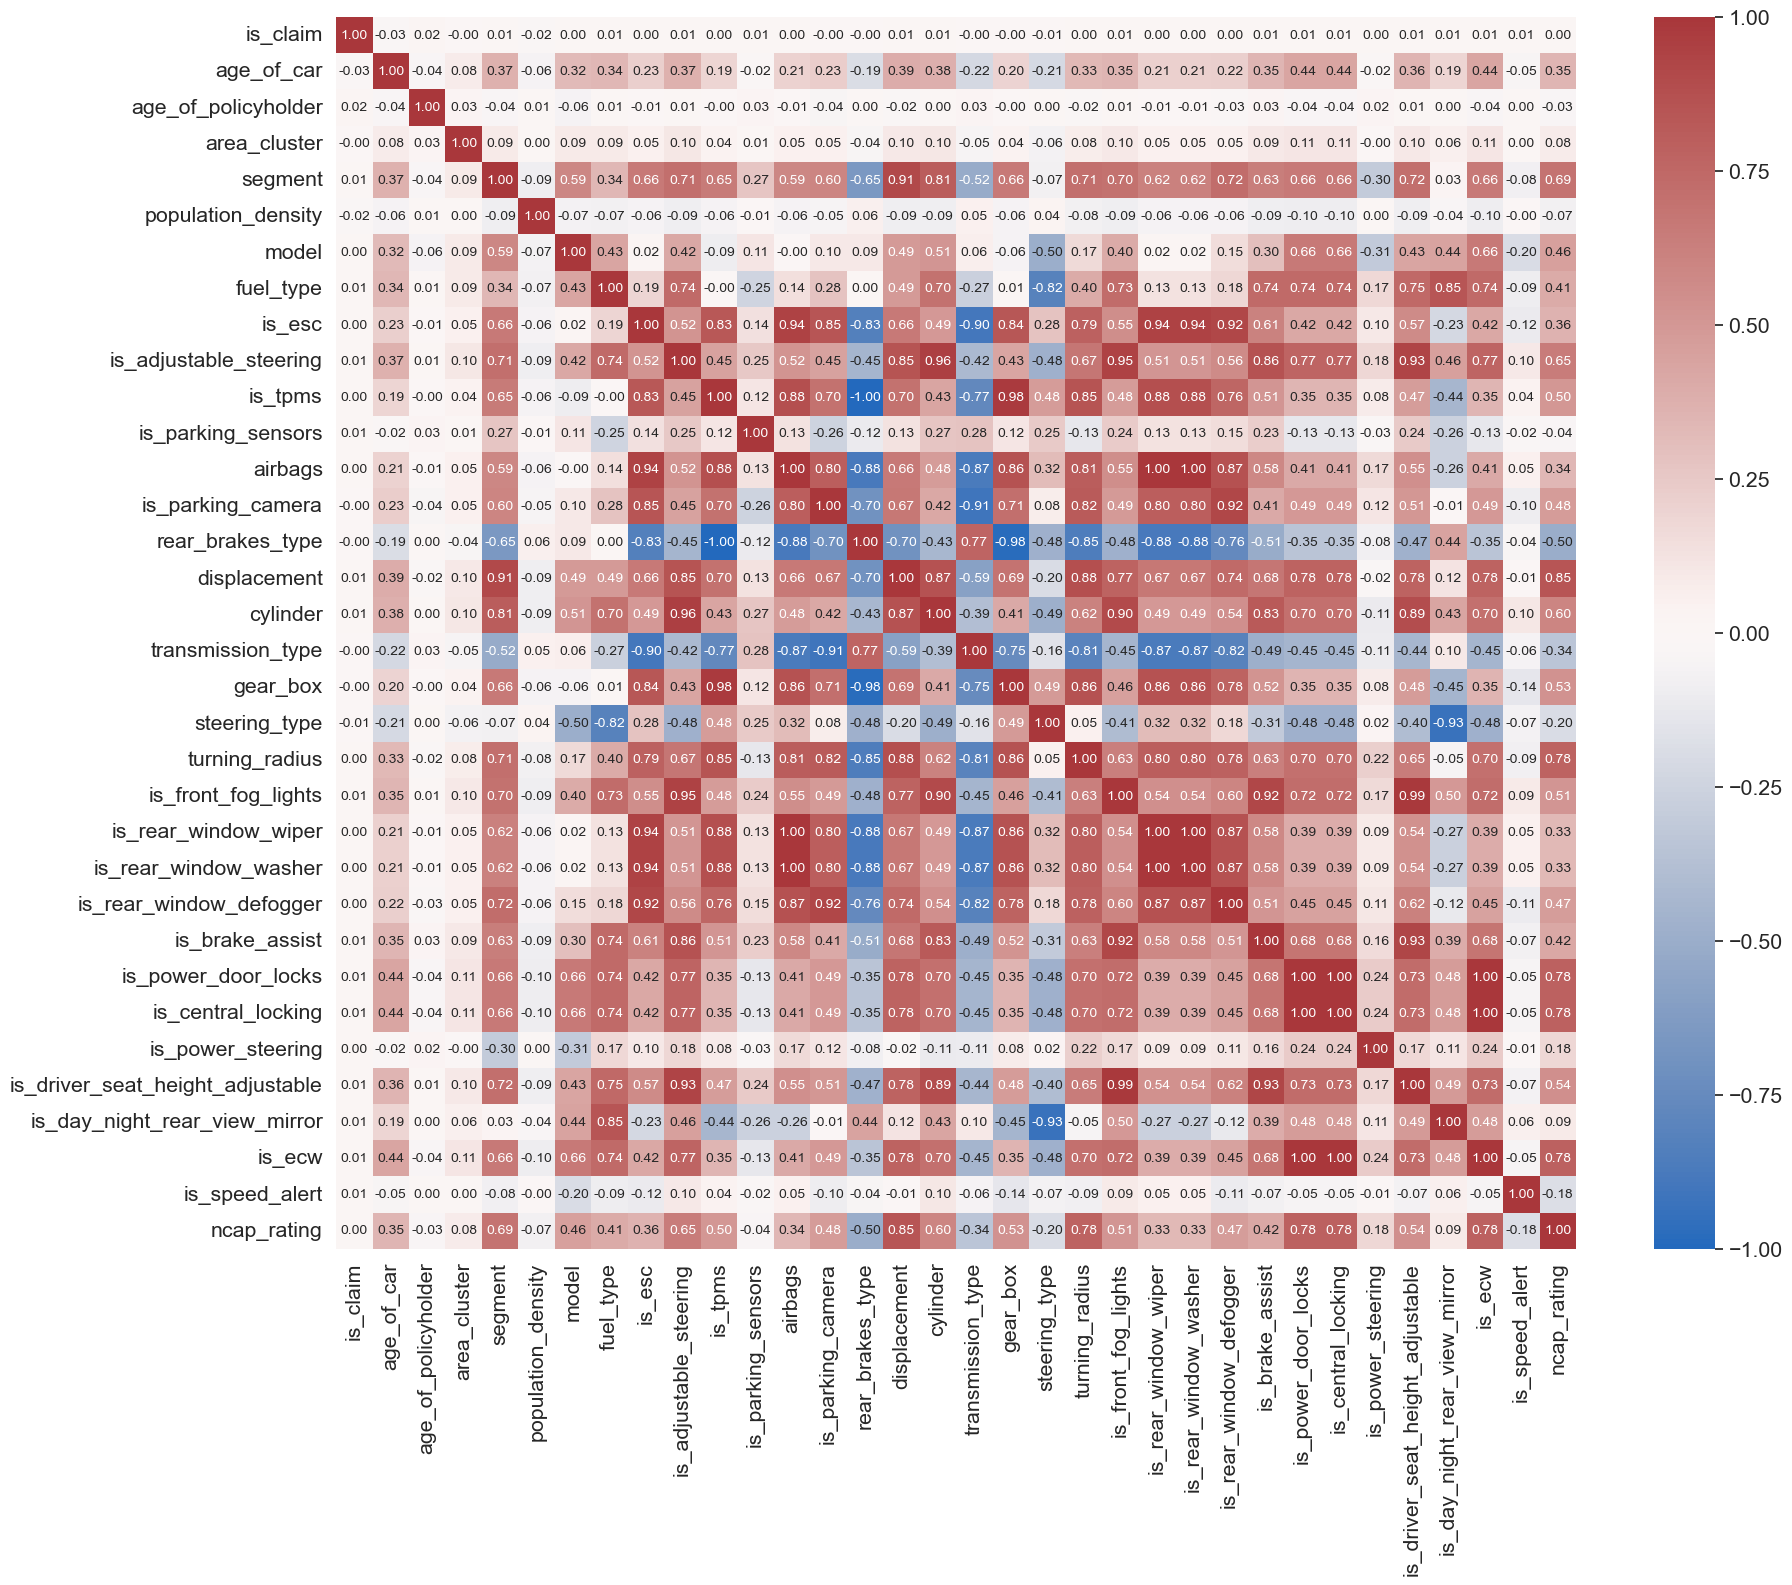

In [81]:
# Ubah data frame menjadi Pandas DataFrame untuk mempermudah analisis
df_pandas = df.toPandas()

# Kolom yang ingin dicek
cols = ['is_claim', 'age_of_car', 'age_of_policyholder', 'area_cluster', 'segment', 'population_density', 'model', 'fuel_type', 
        'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'airbags', 'is_parking_camera', 'rear_brakes_type', 
        'displacement', 'cylinder', 'transmission_type', 'gear_box', 'steering_type', 'turning_radius', 'is_front_fog_lights', 
        'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 
        'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 
        'is_speed_alert', 'ncap_rating']

# Filter kolom dengan lebih dari satu nilai unik
filtered_cols = [col for col in cols if df_pandas[col].nunique() > 1]

# Tampilkan kolom yang dihapus
for col in cols:
    if col not in filtered_cols:
        print(f"Menghapus kolom {col} karena hanya memiliki 1 nilai unik.")

# Membuat correlation matrix hanya dengan kolom yang relevan dan sudah bersih dari null
corr_matrix = df_pandas[filtered_cols].corr()

plt.figure(figsize=(20, 16))
sns.set(font_scale=1.4)
heat = sns.heatmap(corr_matrix, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".2f", annot_kws={"size": 10})
plt.show()

# SPARK Stop

In [90]:
spark.stop()